In [ ]:
#### Installs - only un-comment if needed

!pip install scikit-posthocs



# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import seaborn as sns
import string
import scikit_posthocs as sp
import statsmodels.api as sm
import arviz as az

# Required partial libraries
from sklearn.metrics import confusion_matrix, classification_report
from scipy.optimize import minimize_scalar
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.utils import shuffle
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import pearsonr
from matplotlib.colors import LinearSegmentedColormap
from scipy import interpolate
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests


In [ ]:
# Importing datasets
# This code will need to be modified to match file locations on local machine
EAR = pd.read_csv('/content/Supplemental Tables - Supplemental Table 1.csv', skiprows=1)
SynEAR = pd.read_csv('/content/Supplemental Tables - Supplemental Table 3.csv', skiprows=1)
NonEAR = pd.read_csv('/content/Supplemental Tables - Supplemental Table 4.csv', skiprows=1)
tandem_SRDX = pd.read_csv('/content/Supplemental Tables 1-7 - Supplmental Table 5.csv', skiprows=1)
RTqPCR = pd.read_csv('/content/Supplemental Tables - Supplemental Table 7.csv', skiprows=1)



EAR.head(50) # just checking for correct import
#SynEAR.head() uncomment to check in on any of the datasets
#Non_EAR.head()
# num_unique_constructs = EAR['construct_true'].nunique()
# print(num_unique_constructs)

,construct_true,color_class,ID,composition,motif_color,green_blanked,red_blanked,green_red_ratio,log2_ratio,log10_ratio
0,gal4,gal4,101_1,NaN,neither,998.000,192.375,5.187784,2.375118,0.714982
1,gal4,gal4,101_1,NaN,neither,2444.250,2401.750,1.017695,0.025306,0.007618
2,gal4,gal4,101_1,NaN,neither,3120.500,1362.500,2.290275,1.195521,0.359888
3,gal4,gal4,101_1,NaN,neither,3687.250,951.125,3.876725,1.954838,0.588465
4,gal4,gal4,101_1,NaN,neither,4131.250,1296.875,3.185542,1.671539,0.503183
5,gal4,gal4,101_1,NaN,neither,4409.375,2955.250,1.492048,0.577294,0.173783
6,gal4,gal4,101_2,NaN,neither,563.125,237.375,2.372301,1.246287,0.375170
7,gal4,gal4,101_2,NaN,neither,2262.250,1502.875,1.505282,0.590033,0.177618
8,gal4,gal4,101_2,NaN,neither,2580.875,2794.625,0.923514,-0.114794,-0.034557
9,gal4,gal4,101_2,NaN,neither,3142.625,1137.625,2.762444,1.465945,0.441293


In [ ]:
EAR_strongest = EAR_strongest = EAR[EAR['construct_true'].isin(['SRDX', '116', '158', '148', '135', '140', '166'])] # EAR repressors stronger than SRDX

#EAR_strongest.head()

,construct_true,color_class,ID,composition,motif_color,green_blanked,red_blanked,green_red_ratio,log2_ratio,log10_ratio
17,SRDX,SRDX,102_1,LDLDLELRLGFA,LxLxL,73.125,142.750,0.512259,-0.965054,-0.290510
18,SRDX,SRDX,102_1,LDLDLELRLGFA,LxLxL,82.875,370.500,0.223684,-2.160465,-0.650365
19,SRDX,SRDX,102_1,LDLDLELRLGFA,LxLxL,112.375,279.000,0.402778,-1.311944,-0.394934
20,SRDX,SRDX,102_1,LDLDLELRLGFA,LxLxL,137.625,405.375,0.339500,-1.558515,-0.469160
21,SRDX,SRDX,102_1,LDLDLELRLGFA,LxLxL,140.625,495.250,0.283948,-1.816304,-0.546762


In [ ]:
# determining whether anything is statistically stronger than SRDX
dunn = sp.posthoc_dunn(EAR_strongest, val_col='green_blanked', group_col='construct_true', p_adjust='bonferroni')

# Extract p-values comparing to 'SRDX' - running a multiple comparison
control_group = 'SRDX'
p_values_vs_srdx = dunn.loc[:, control_group] if control_group in dunn.columns else None

print("Pairwise comparisons to SRDX with Bonferroni adjustment:")
print(p_values_vs_srdx)


Pairwise comparisons to SRDX with Bonferroni adjustment:
116     1.0
135     1.0
140     1.0
148     1.0
158     1.0
166     1.0
SRDX    1.0
Name: SRDX, dtype: float64


In [ ]:
# Natural EARs
# Determining which constructs are repressors
# By numerical threshold in order to make a clean plot for maintext
gal4_avg = EAR[EAR['construct_true'] == 'gal4']['green_blanked'].mean()
print(gal4_avg)

# Step 2: Calculate the average 'green_blanked' per 'construct_true'
avg_green_blanked = EAR.groupby('construct_true')['green_blanked'].mean()


# Step 3: Function to categorize based on the calculated averages
def categorize(construct, avg):
    if construct in []: # 'gal4', 'SRDX' - no longer have a distinct category for controls
        return 'control'
    elif avg > 2 * gal4_avg:
        return 'activator'
    elif avg < 0.5 * gal4_avg:
        return 'repressor'
    else:
        return 'neutral'

# Step 4: Apply the function to create a new column
EAR['category'] = EAR.apply(lambda row: categorize(row['construct_true'], avg_green_blanked[row['construct_true']]), axis=1)

# Display the modified DataFrame
print(EAR[['construct_true', 'green_blanked', 'category']])

unique_counts = EAR.groupby('category')['construct_true'].nunique()
print(unique_counts)

# Statistical significance thresholding version
# We can use this to get a better idea of what thresholds we should choose
# Plot this in supplement
EAR_cleaned = EAR[EAR['green_blanked'].notna()]

# Isolate 'gal4' data for comparison
gal4_data = EAR_cleaned[EAR_cleaned['construct_true'] == 'gal4']['green_blanked']

def compare_to_gal4(construct):
    if construct in ['gal4', 'SRDX']:
        return 'control'
    else:
        construct_data = EAR_cleaned[EAR_cleaned['construct_true'] == construct]['green_blanked']

        # Perform the Mann-Whitney U test
        stat, p_value = mannwhitneyu(gal4_data, construct_data, alternative='two-sided')

        # Determine categories based on p-value and median comparison
        if p_value < 0.05:  # using a 5% significance level
            if construct_data.median() > gal4_data.median():
                return 'activator'
            else:
                return 'repressor'
        else:
            return 'neutral'

# Apply the comparison function across unique constructs
constructs = EAR_cleaned['construct_true'].unique()
construct_category_map = {construct: compare_to_gal4(construct) for construct in constructs}

# Map the results back to the DataFrame
EAR['stat_category'] = EAR['construct_true'].map(construct_category_map)


2891.595588235294
    construct_true  green_blanked category
0             gal4        998.000  neutral
1             gal4       2444.250  neutral
2             gal4       3120.500  neutral
3             gal4       3687.250  neutral
4             gal4       4131.250  neutral
..             ...            ...      ...
304            195       1570.000  neutral
305            195       1162.125  neutral
306            196        903.500  neutral
307            196        901.250  neutral
308            196       2613.625  neutral

[309 rows x 3 columns]
category
neutral      32
repressor    53
Name: construct_true, dtype: int64


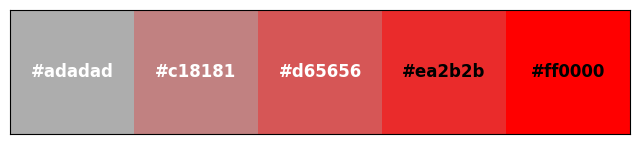

Generated Color Palette (HEX codes):
Color 1: #adadad
Color 2: #c18181
Color 3: #d65656
Color 4: #ea2b2b
Color 5: #ff0000


In [ ]:
# generating the color scheme

# Start and end colors
start_hex = '#adadad'  # Light Gray (Note: Removing the alpha channel for simplicity)
end_hex = '#ff0000'    # Red

# Number of colors in the palette
n_colors = 5


# Create a Color Map from the defined colors
color_map = LinearSegmentedColormap.from_list("custom_map", [start_hex, end_hex], N=n_colors)

# Generate the colors
palette = color_map(np.linspace(0, 1, n_colors))

# Convert colors to hex
hex_colors = ['#{:02x}{:02x}{:02x}'.format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)) for rgb in palette]

# Display the colors
fig, ax = plt.subplots(figsize=(8, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, facecolor=color))
    ax.annotate(color, (i + 0.5, 0.5), color='w' if i < n_colors / 2 else 'k',
                weight='bold', fontsize=12, ha='center', va='center')

plt.xlim(0, n_colors)
plt.ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.show()

# Output the hex colors
print("Generated Color Palette (HEX codes):")
for i, color in enumerate(hex_colors):
    print(f"Color {i + 1}: {color}")


# Other colors I like
# #0600ffff  the blue for controls in supplemental plots

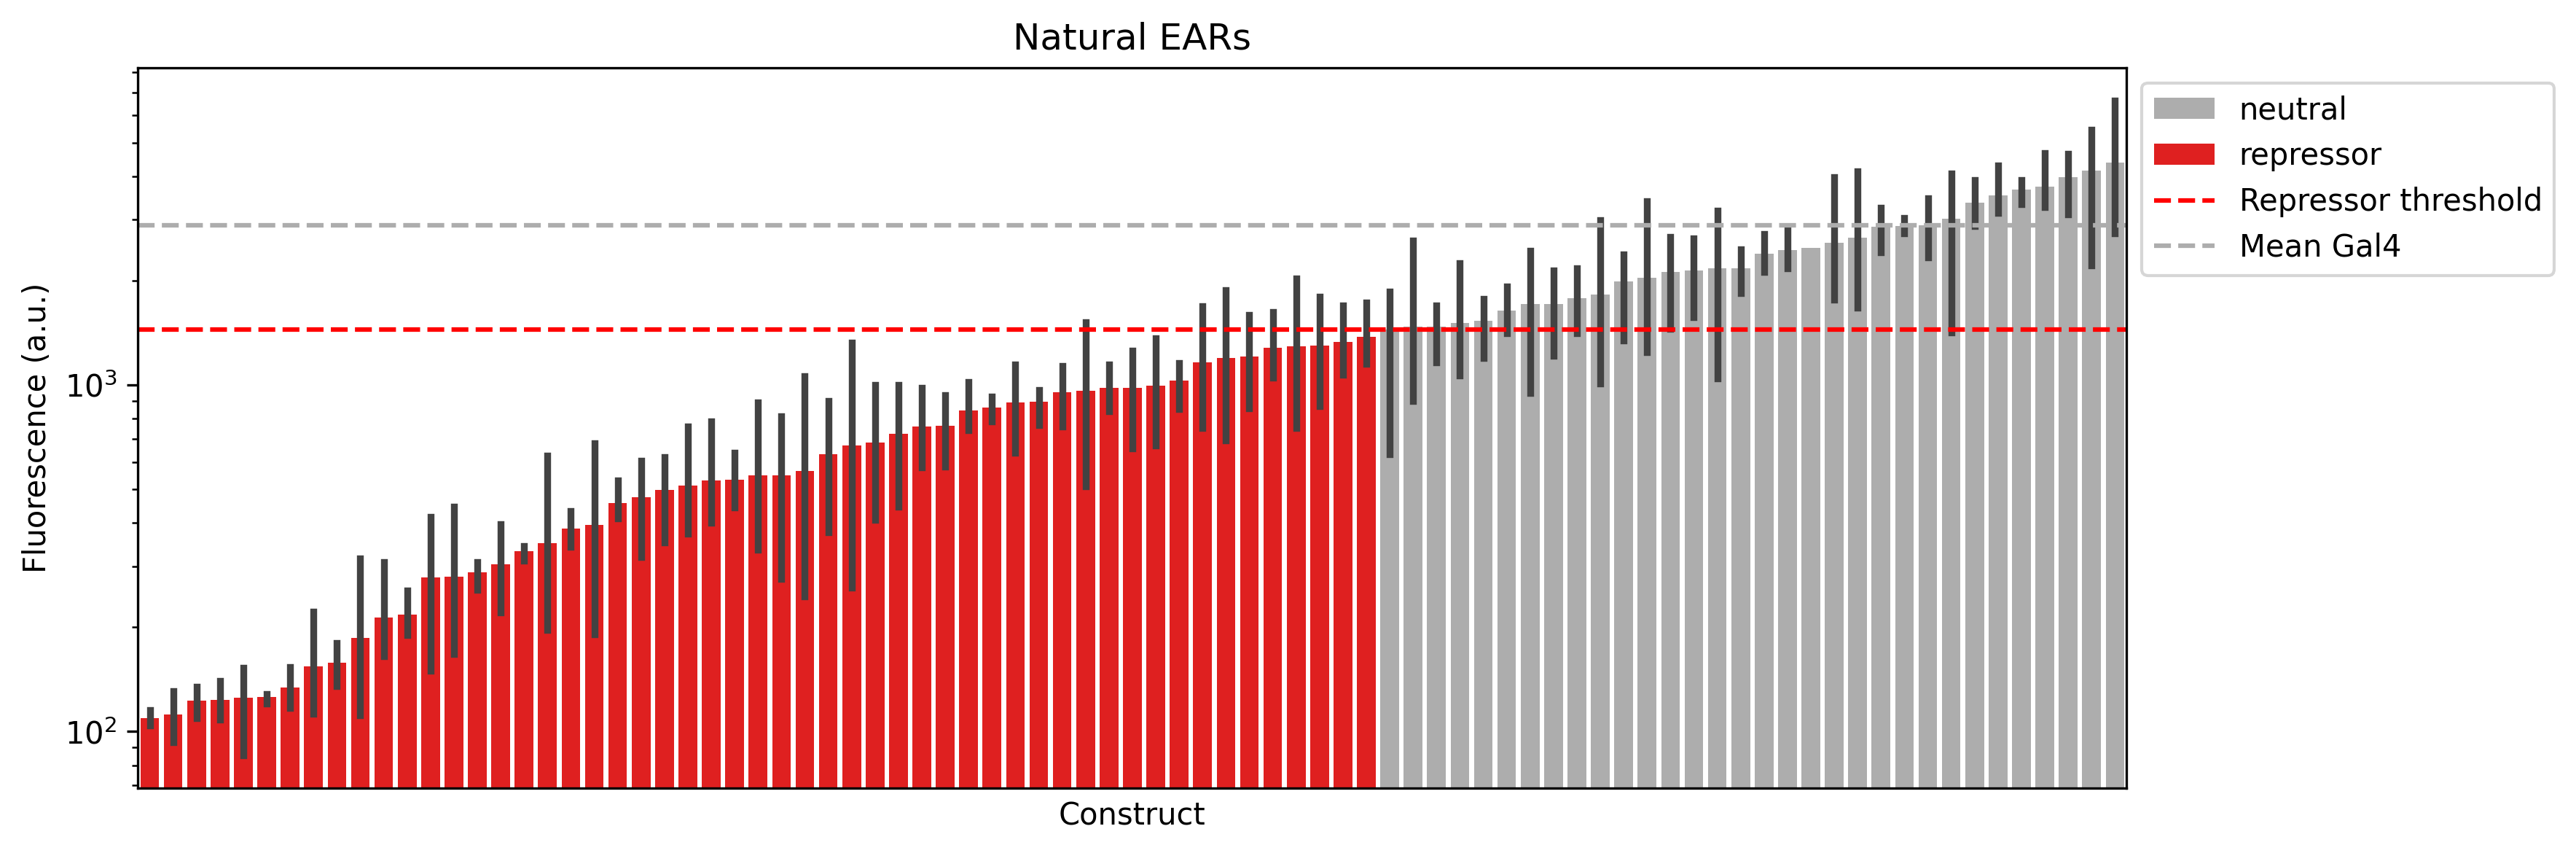

In [ ]:
#  Figure 1B code - natural EAR plot
categories = EAR['category'].unique()
colors_hex = ['#adadad', '#ff0000'] # controls first, repressors second, neutrals third
if len(categories) > len(colors_hex):
    extra_colors = sns.color_palette(n_colors=len(categories) - len(colors_hex))
    colors_hex.extend(extra_colors[:len(categories) - len(colors_hex)])

category_color_map = {category: color for category, color in zip(categories, colors_hex)}

plt.figure(figsize=(12, 4), dpi = 300)

# Order 'construct_true' by the mean 'green_blanked'
order = EAR.groupby('construct_true')['green_blanked'].mean().sort_values().index

# Bar plot colored by 'category'
sns.barplot(x='construct_true', y='green_blanked', hue='category', data=EAR,
            palette=category_color_map, order=order)

# Calculate medians for specific groups
median_srdx = EAR[EAR['construct_true'] == 'SRDX']['green_blanked'].mean()
median_gal4 = EAR[EAR['construct_true'] == 'gal4']['green_blanked'].mean()

# Adding horizontal lines for the medians with specified colors
#plt.axhline(median_srdx, color='#ff0000', linestyle='--', label='Mean SRDX', linewidth=1.5)  # old version for SRDX line
plt.axhline((0.5*median_gal4), color='#ff0000', linestyle='--', label='Repressor threshold', linewidth=1.5)  # new version for represor-threshold line
plt.axhline(median_gal4, color='#adadad', linestyle='--', label='Mean Gal4', linewidth=1.5)  # Light Gray

plt.title('Natural EARs')
plt.xlabel('Construct')
plt.ylabel('Fluorescence (a.u.)')

# Remove x-axis labels
plt.xticks([])

# Adjust the legend for 'category' and the new lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Ensuring no duplicate legend entries
plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.yscale('log')  # Keeping the log scale for the y-axis
plt.show()


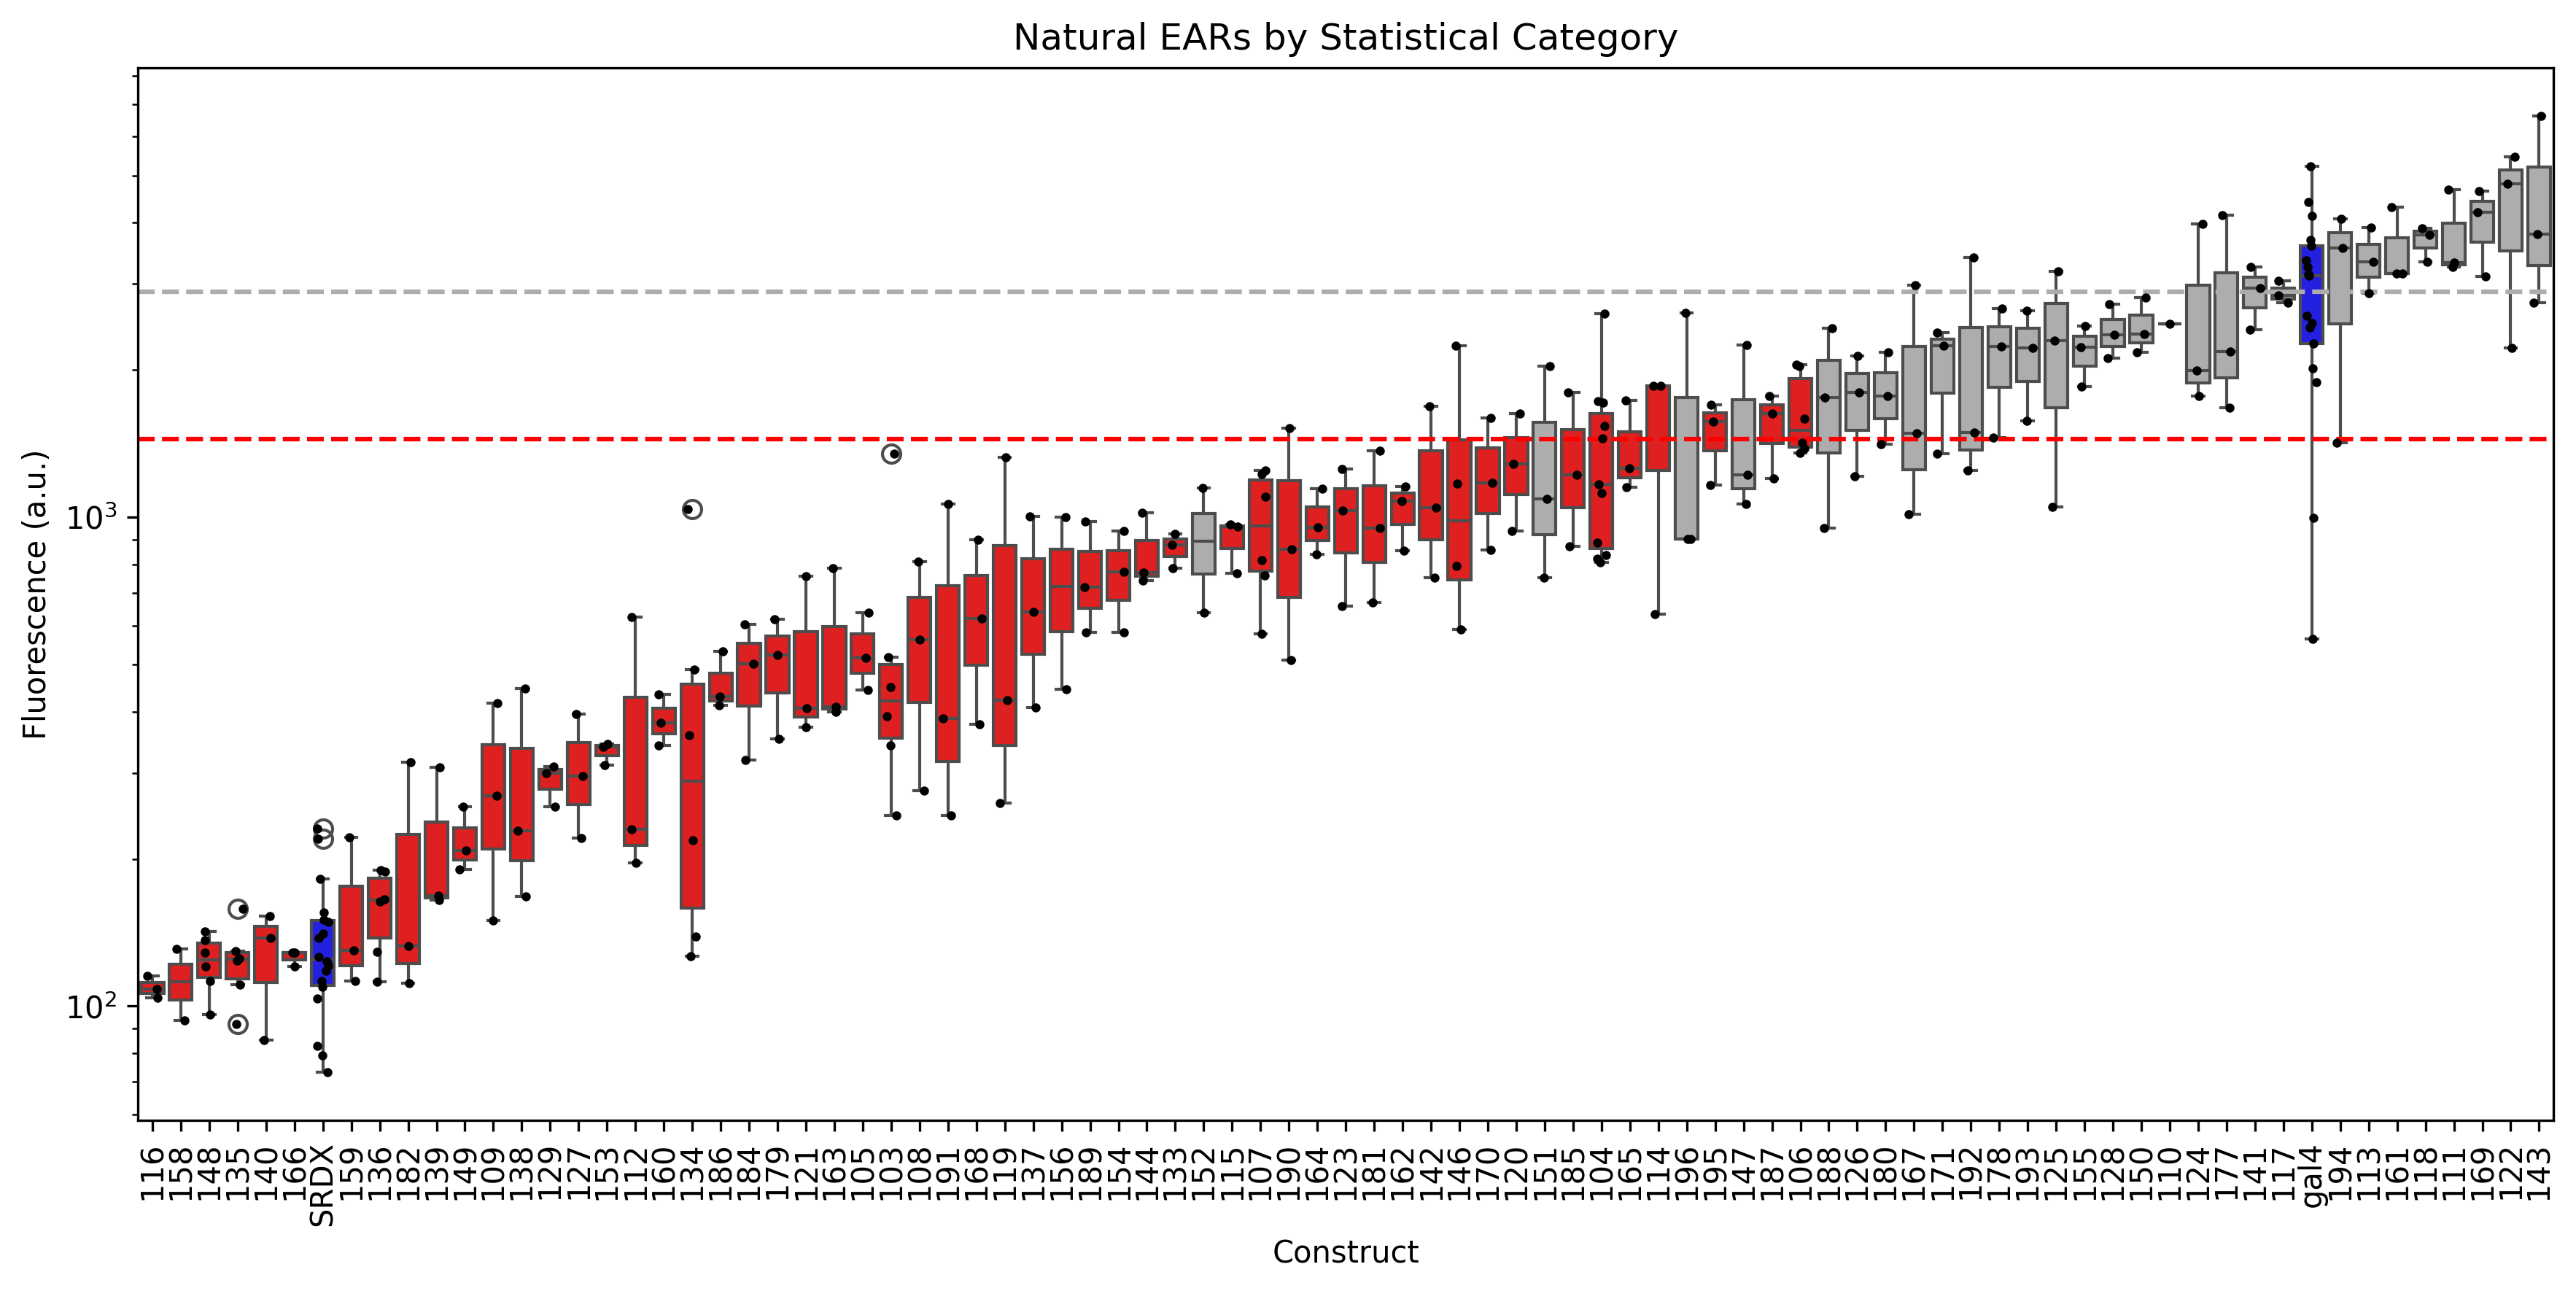

In [ ]:
# Supplemental EAR dataset plots
# Statistical significance colored version
plt.figure(figsize=(12, 6), dpi = 300)
category_color_map = ['#0600ffff', '#ff0000', '#adadad'] # controls first, then repressors, then neutrals


# Order 'construct_true' by the mean 'green_blanked'
order = EAR.groupby('construct_true')['green_blanked'].mean().sort_values().index

# Box plot colored by 'stat_category'
sns.boxplot(x='construct_true', y='green_blanked', hue='stat_category', data=EAR,
            palette=category_color_map, order=order)

# Scatter overlay
sns.stripplot(x='construct_true', y='green_blanked', data=EAR, color='black',
              jitter=0.2, size=3, order=order)

plt.title('Natural EARs by Statistical Category')
plt.xlabel('Construct')
plt.ylabel('Fluorescence (a.u.)')
plt.xticks(rotation=90)

plt.axhline((0.5*median_gal4), color='#ff0000', linestyle='--', label='Repressor threshold', linewidth=1.5)  # new version for represor-threshold line
plt.axhline(median_gal4, color='#adadad', linestyle='--', label='Mean Gal4', linewidth=1.5)  # Light Gray

# Simplify legend (unique entries only)
handles, labels = plt.gca().get_legend_handles_labels()  # Collect handles and labels from the plot
unique_labels = dict(zip(labels, handles))  # Use a dict to remove duplicates
# Adjust the position and show the legend for 'stat_category'
plt.legend(unique_labels.values(), unique_labels.keys(), title='Statistical category', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.legend().remove()

plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.yscale('log')
plt.show()

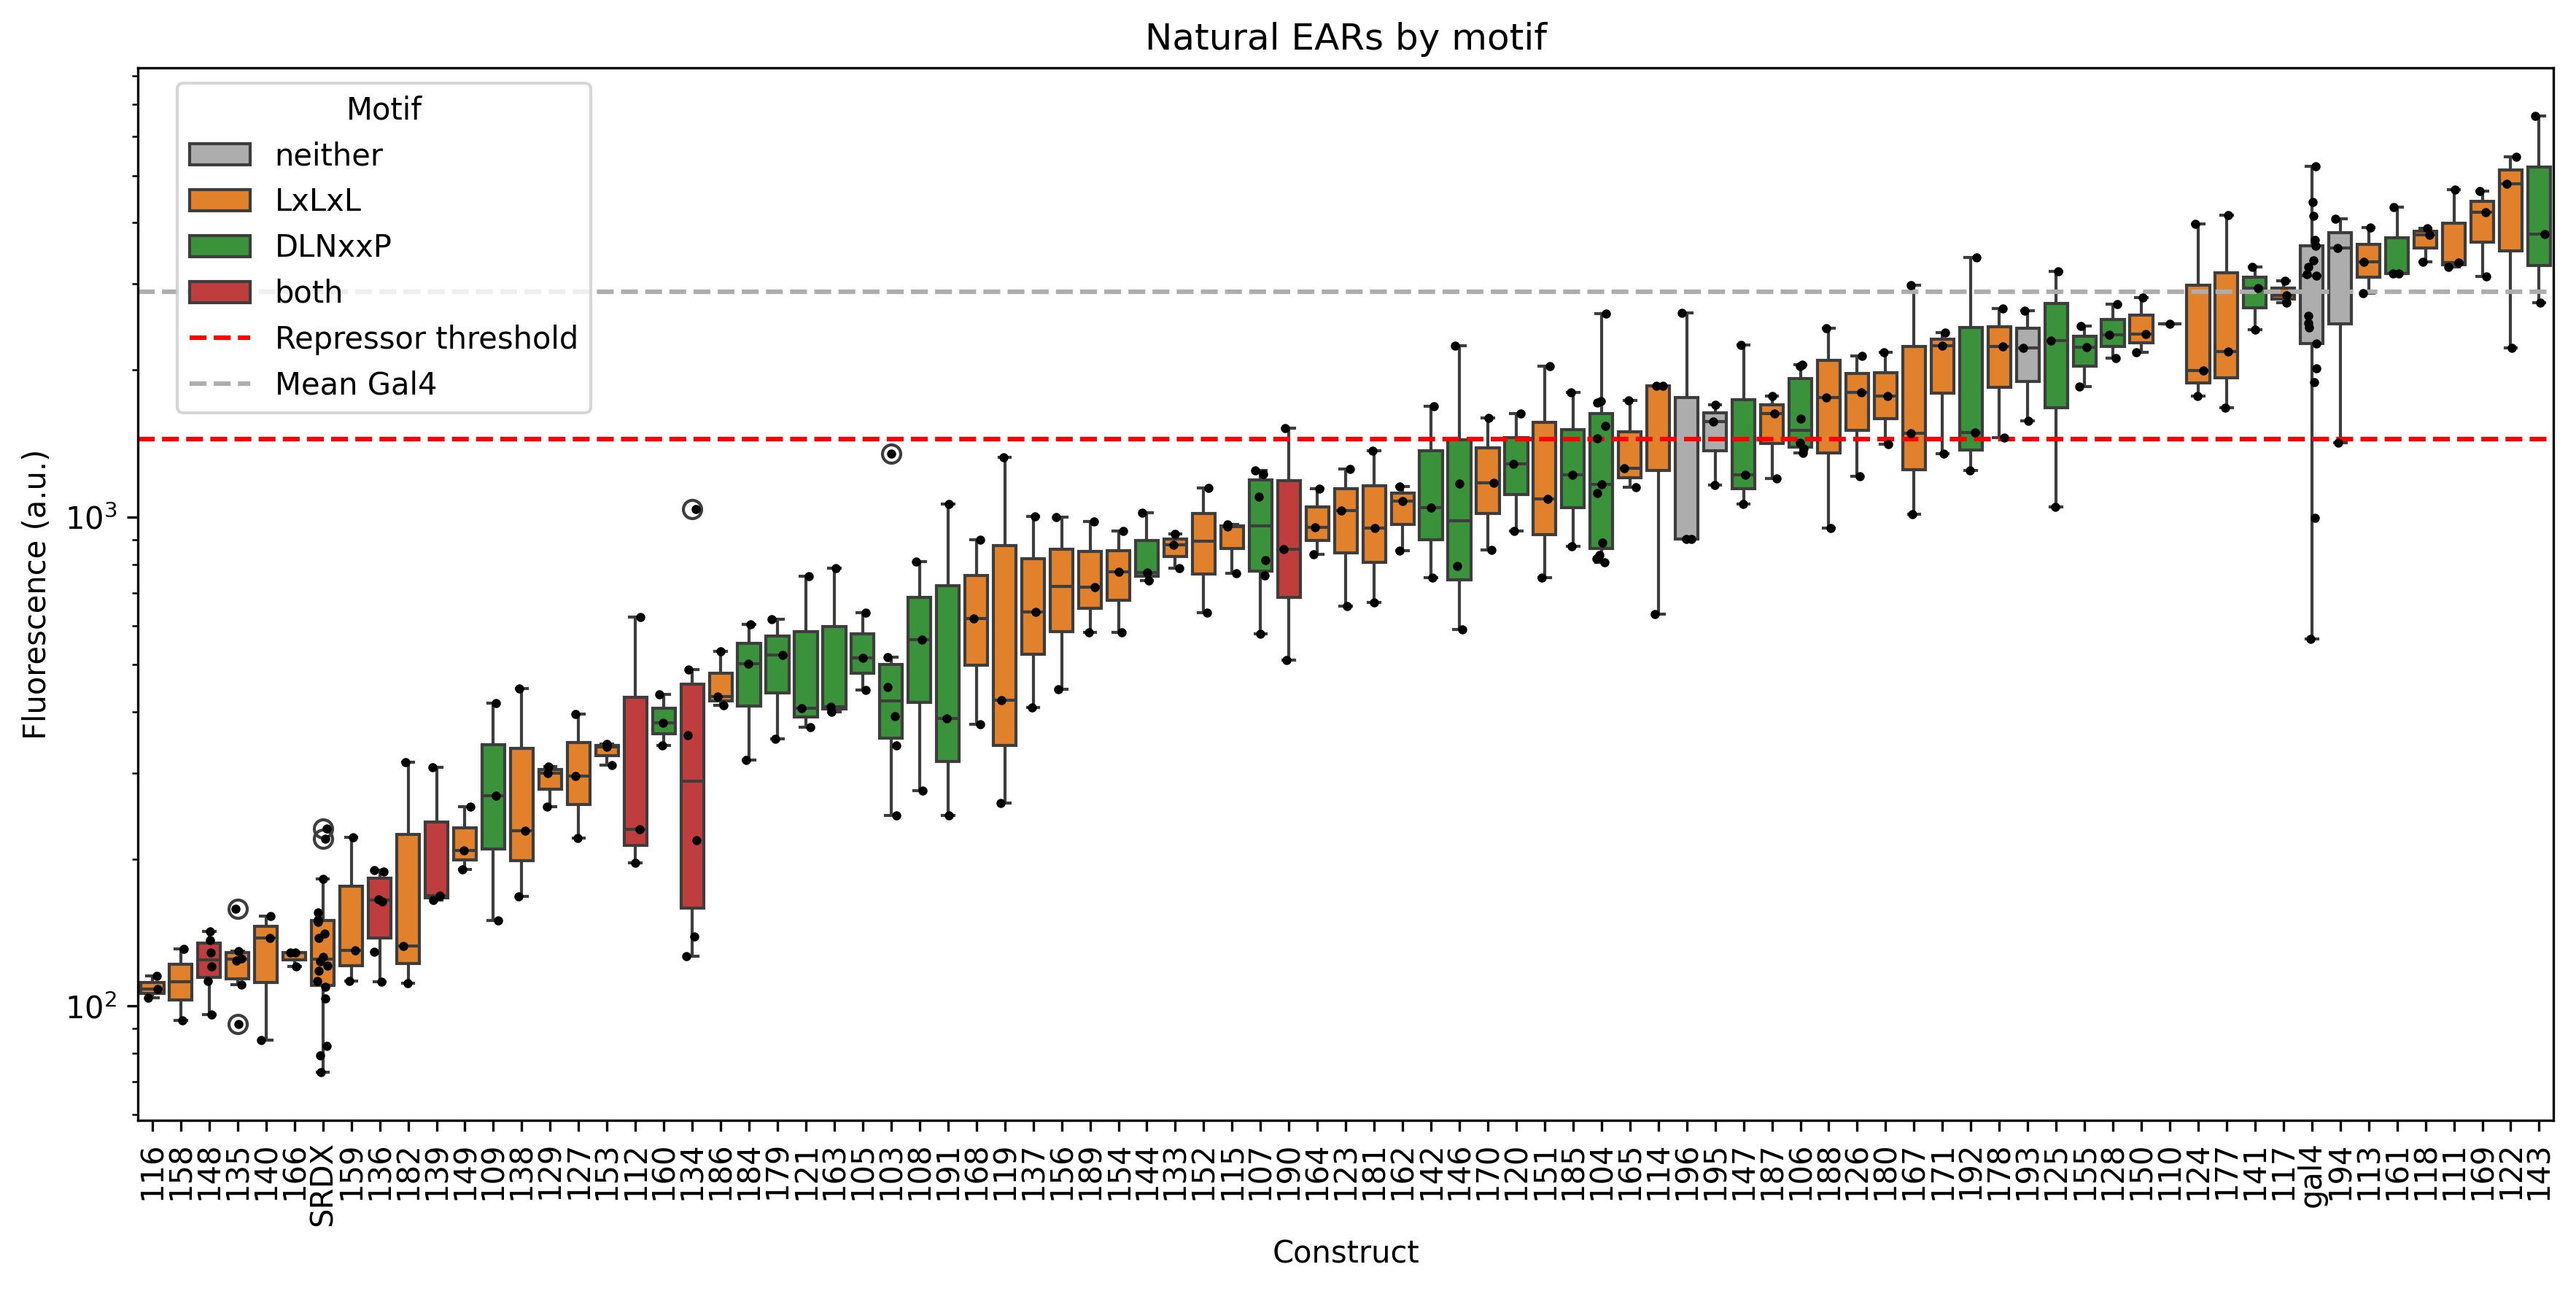

In [ ]:
# Natural EARs by motif for supplemental plot
unique_motif_colors = EAR['motif_color'].unique()
colors_hex = ['#adadad', '#ff7f0e', '#2ca02c', '#d62728']

if len(unique_motif_colors) > len(colors_hex):
    extra_colors = sns.color_palette(n_colors=len(unique_motif_colors) - len(colors_hex))
    colors_hex.extend(extra_colors)

color_map = {motif: color for motif, color in zip(unique_motif_colors, colors_hex)}

plt.figure(figsize=(12, 6), dpi = 300)

# Order 'construct_true' by the mean 'green_blanked'
order = EAR.groupby('construct_true')['green_blanked'].mean().sort_values().index

# Box plot
sns.boxplot(x='construct_true', y='green_blanked', hue='motif_color', data=EAR,
            palette=color_map, order=order)

# Scatter overlay
sns.stripplot(x='construct_true', y='green_blanked', data=EAR, color='black',
              jitter=0.2, size=3, order=order)

median_srdx = EAR[EAR['construct_true'] == 'SRDX']['green_blanked'].mean()
median_gal4 = EAR[EAR['construct_true'] == 'gal4']['green_blanked'].mean()

# Adding horizontal lines for the medians with specified colors

plt.axhline((0.5*median_gal4), color='#ff0000', linestyle='--', label='Repressor threshold', linewidth=1.5)  # new version for represor-threshold line
plt.axhline(median_gal4, color='#adadad', linestyle='--', label='Mean Gal4', linewidth=1.5)  # Light Gray

plt.title('Natural EARs by motif')
plt.xlabel('Construct')
plt.ylabel('Fluorescence (a.u.)')
plt.xticks(rotation=90)

# Simplify legend (unique entries only)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
# Adjust the position to top left
plt.legend(unique_labels.values(), unique_labels.keys(), title='Motif', loc='upper left', bbox_to_anchor=(0.01, 1))
#plt.legend().remove()


plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.yscale('log')
plt.show()



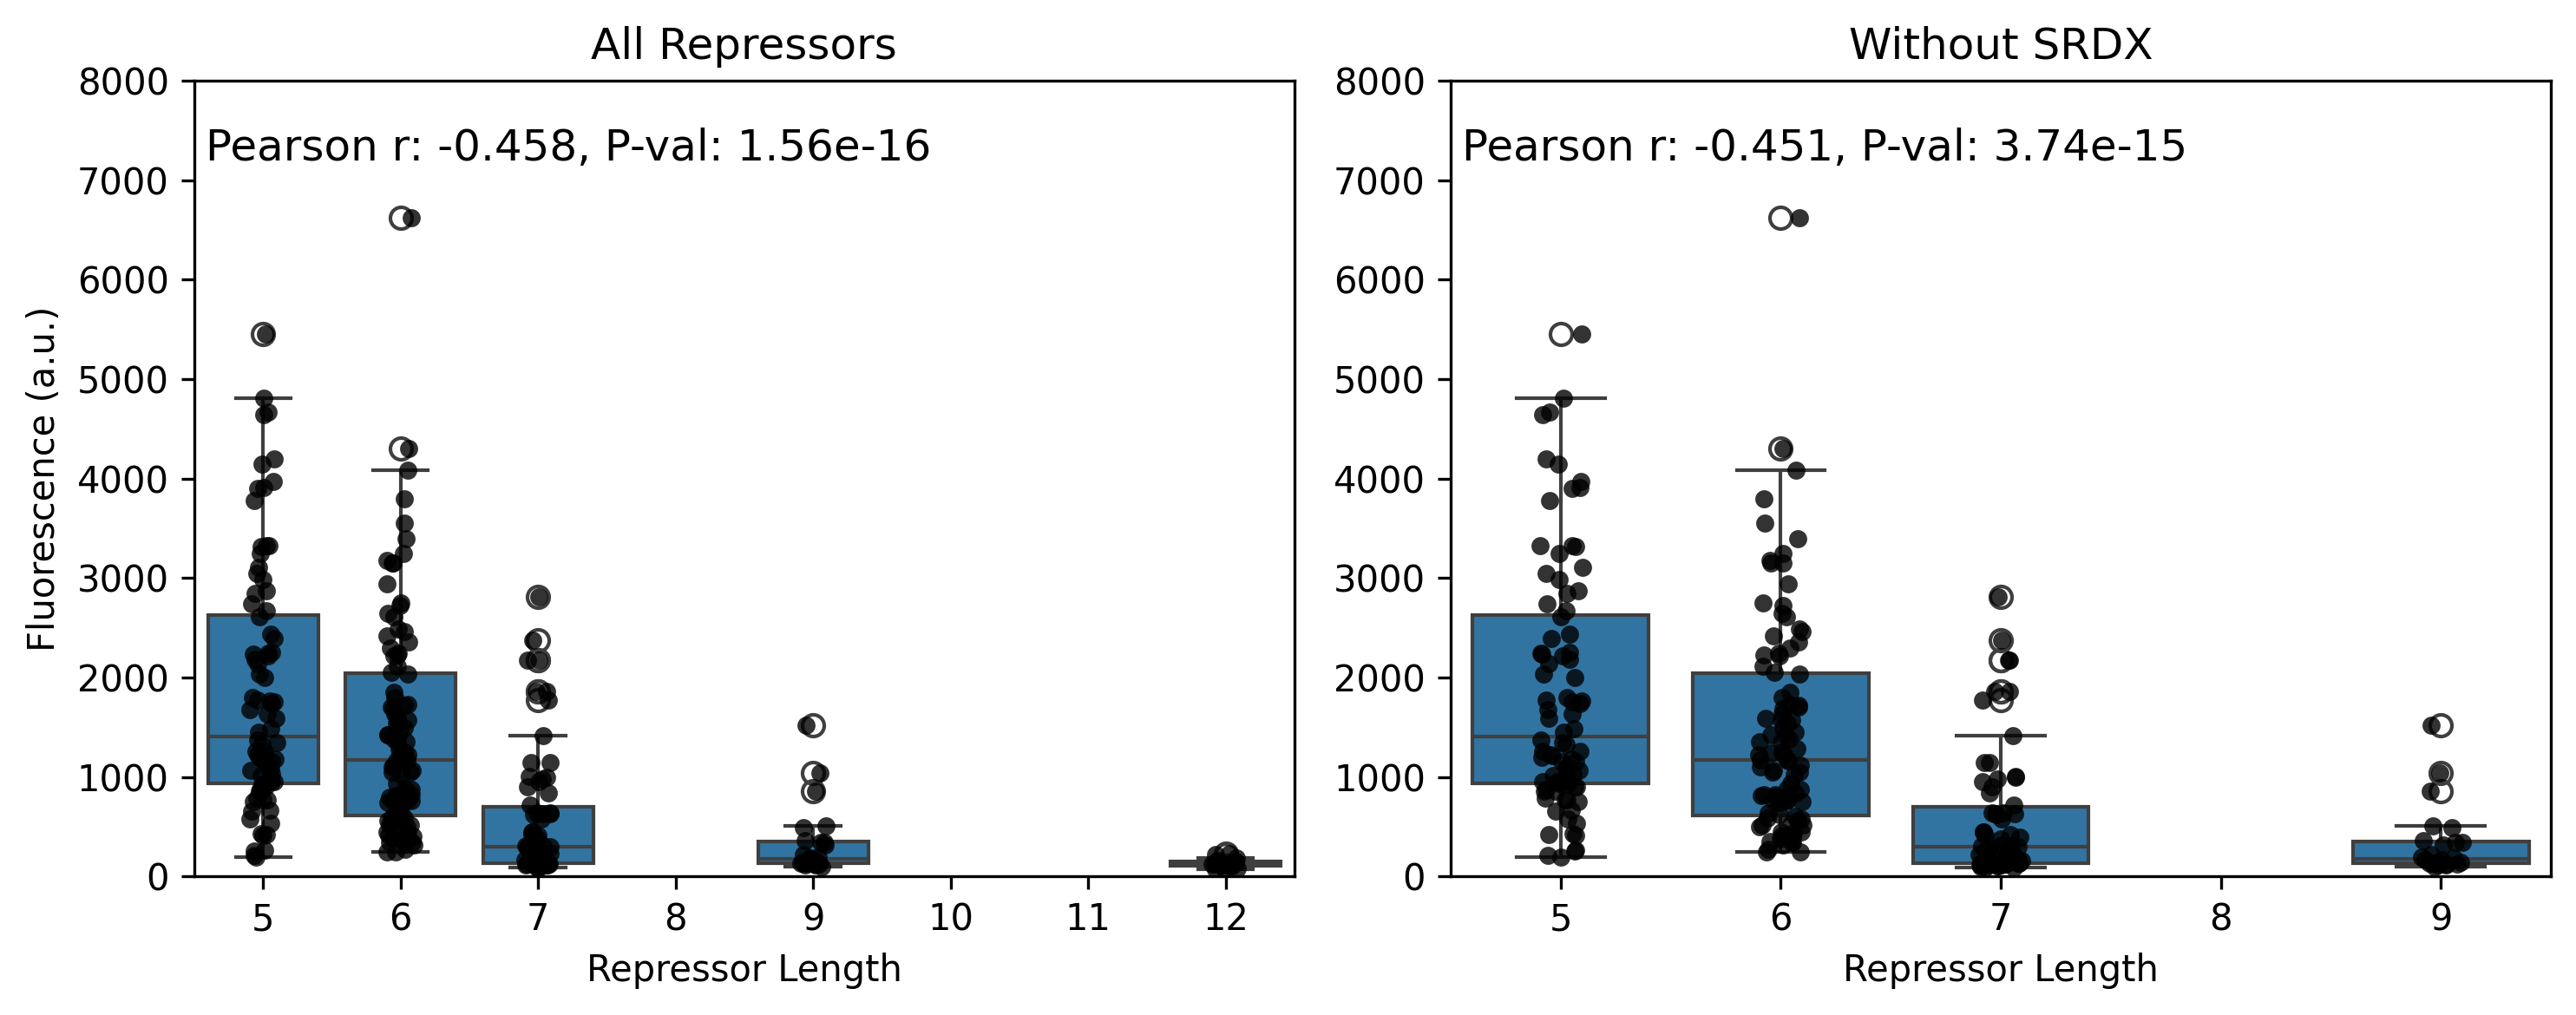

In [ ]:
# Length strength plots
EAR.dropna(subset=['composition', 'green_blanked'], inplace=True)
EAR['composition_length'] = EAR['composition'].str.len()

# Excluding specific controls
EAR_nocontrol = EAR[(EAR['construct_true'] != 'SRDX') & (EAR['composition_length'] <= 9)]

# Calculate Pearson correlations for 'composition_length' and 'green_blanked'
corr_all, p_val_all = pearsonr(EAR['composition_length'], EAR['green_blanked'])
corr_no_srdx, p_val_no_srdx = pearsonr(EAR_nocontrol['composition_length'], EAR_nocontrol['green_blanked'])

# Plot preparation
fig = plt.figure(figsize=(10, 4), dpi = 300)
ax2 = plt.subplot(1, 2, 1)
ax3 = plt.subplot(1, 2, 2)

# Defining specific range for 'composition_length' based on required plot details
full_range_all = list(range(5, 13))  # 5 to 12 inclusive, will show empty spots for lengths without data
full_range_no_srdx = list(range(5, 10))  # 5 to 9 inclusive

# Bottom left plot for all repressors
sns.boxplot(x='composition_length', y='green_blanked', data=EAR, ax=ax2, order=full_range_all)
sns.stripplot(x='composition_length', y='green_blanked', data=EAR, ax=ax2, color='black', jitter=True, alpha=0.8, order=full_range_all)
ax2.set_title('All Repressors')
ax2.set_xlabel('Repressor Length')
ax2.set_ylabel('Fluorescence (a.u.)')
ax2.set_ylim(0, 8000)
ax2.text(0.01, 0.9, f"Pearson r: {corr_all:.3f}, P-val: {p_val_all:.2e}", transform=ax2.transAxes, fontsize=12)

# Bottom right plot for no SRDX repressors
sns.boxplot(x='composition_length', y='green_blanked', data=EAR_nocontrol, ax=ax3, order=full_range_no_srdx)
sns.stripplot(x='composition_length', y='green_blanked', data=EAR_nocontrol, ax=ax3, color='black', jitter=True, alpha=0.8, order=full_range_no_srdx)
ax3.set_title('Without SRDX')
ax3.set_xlabel('Repressor Length')
ax3.set_ylabel('')
ax3.set_ylim(ax2.get_ylim())  # Ensuring both plots have the same y-axis range for consistency
ax3.text(0.01, 0.9, f"Pearson r: {corr_no_srdx:.3f}, P-val: {p_val_no_srdx:.2e}", transform=ax3.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
#  SynEAR Section
#SynEAR data formatting
SynEAR['green_blanked'] = pd.to_numeric(SynEAR['green_blanked'], errors='coerce')
SynEAR['red_blanked'] = pd.to_numeric(SynEAR['red_blanked'], errors='coerce')
SynEAR['green_red_ratio'] = pd.to_numeric(SynEAR['green_red_ratio'], errors='coerce')


# Inspect the data types in the dataframe
print(SynEAR.dtypes)

# Convert 'green_blanked' to float, coerce errors to NaN, which could later be handled
SynEAR['green_blanked'] = pd.to_numeric(SynEAR['green_blanked'], errors='coerce')

# Optionally, investigate where NaN values have been introduced
print("Number of NaNs introduced in 'green_blanked':", SynEAR['green_blanked'].isna().sum())

# Drop rows where 'green_blanked' is NaN if these cannot be imputed
SynEAR = SynEAR.dropna(subset=['green_blanked'])



index                 int64
strength_class       object
construct_true       object
composition          object
regex_lxlxl            bool
regex_dln              bool
motif                object
construct_alias      object
date                  int64
green_blanked       float64
repression_ratio    float64
invert_rep_ratio    float64
red_blanked         float64
green_red_ratio     float64
dtype: object
Number of NaNs introduced in 'green_blanked': 1


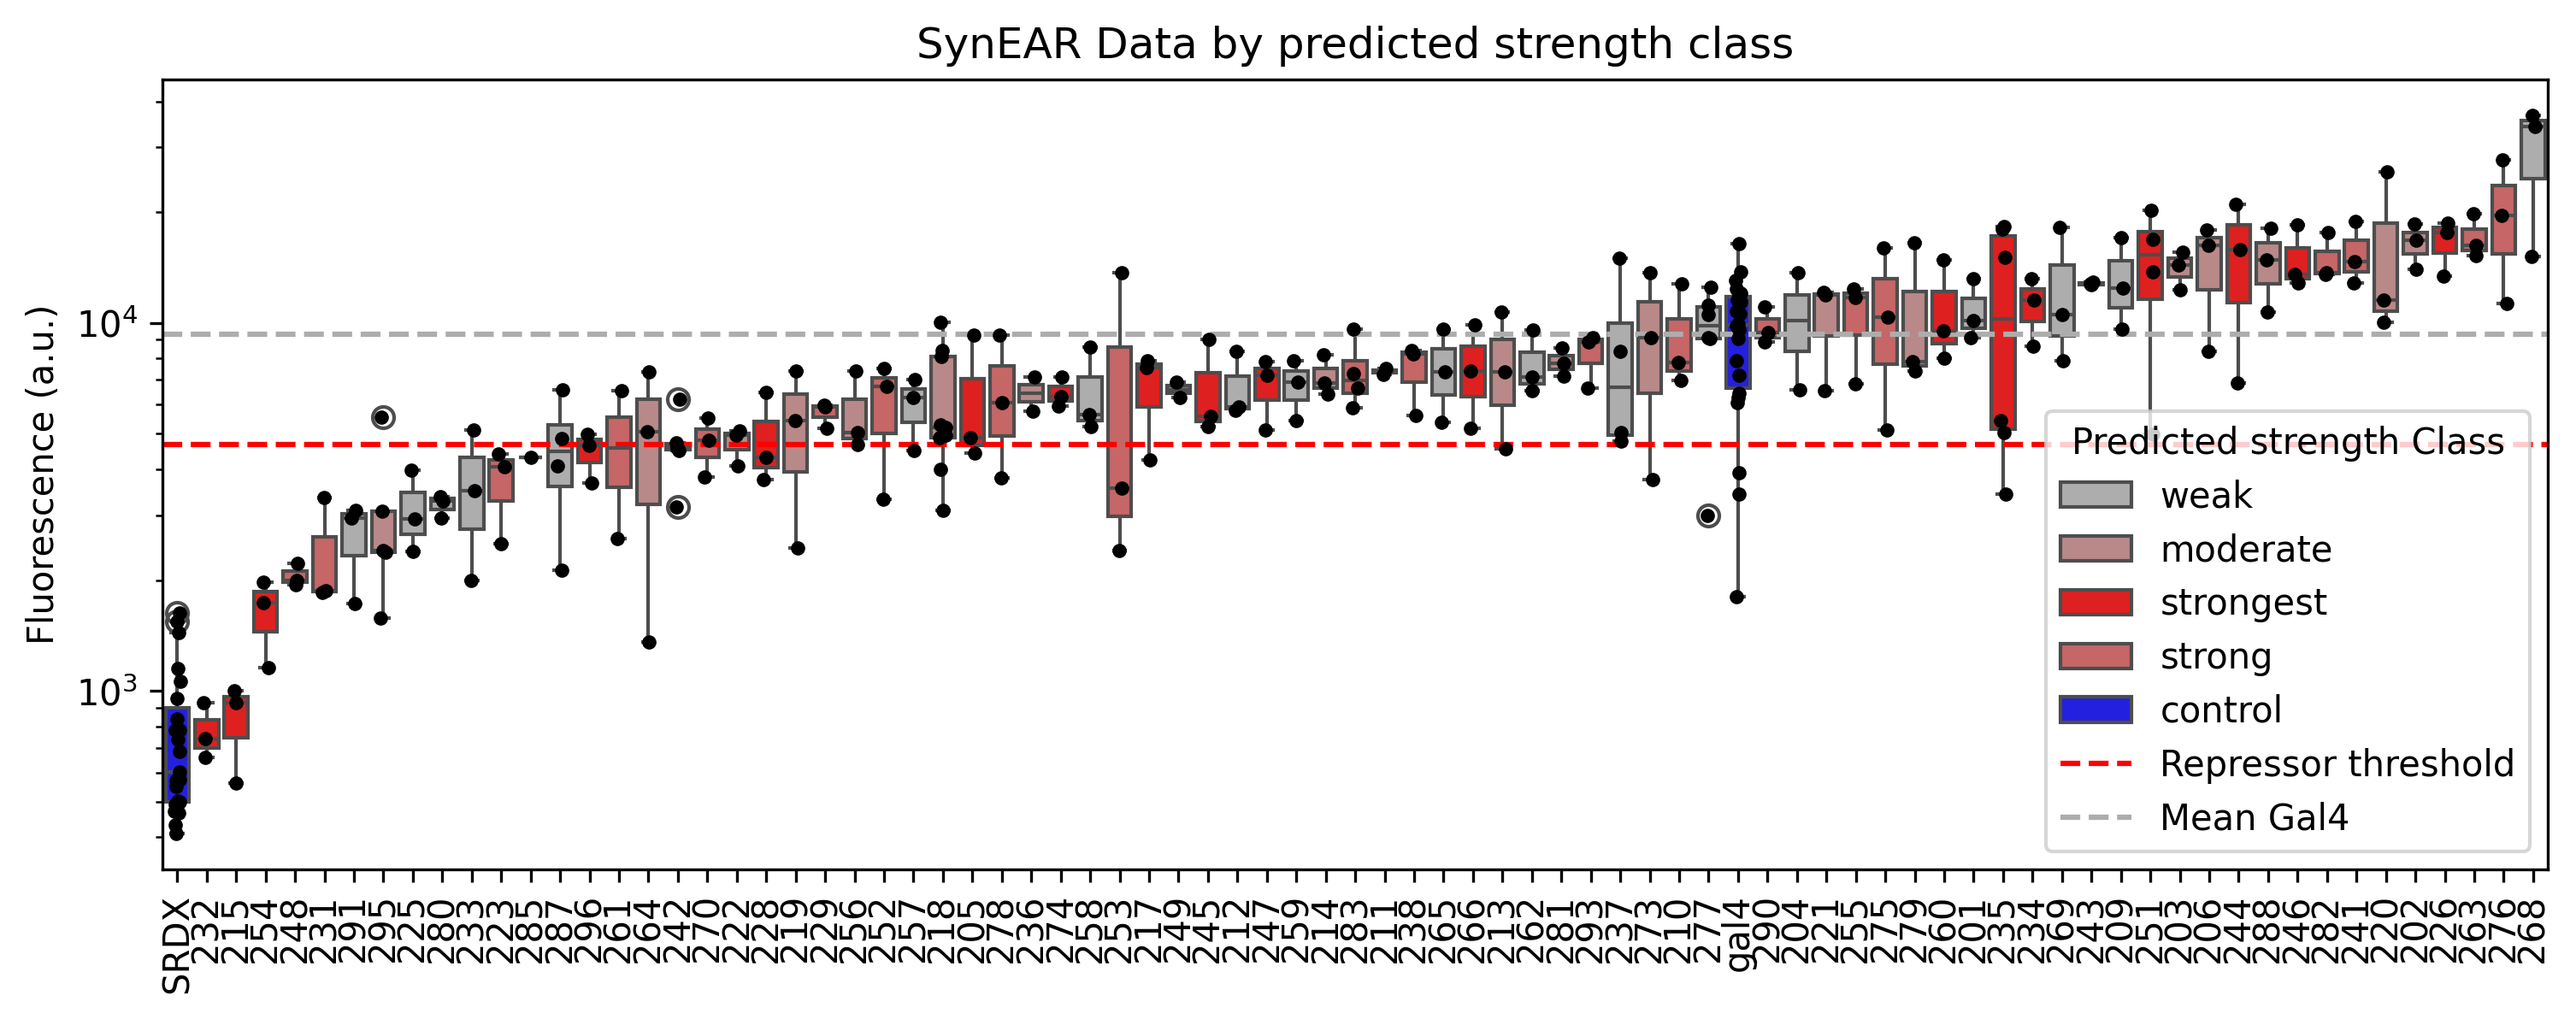

In [ ]:
# Graphing SynEAR experimental data
# Plotting SynEAR data by predicted strength class

order = SynEAR.groupby('construct_true')['green_blanked'].mean().sort_values().index

color_palette = {
    'weak': '#adadad',        # Blue
    'moderate': '#c18181',      # Green
    'strong': '#d65656',         # Red
    'strongest': '#ff0000',   # Purple
    'control': '#0600ffff'     # Orange
}

plt.figure(figsize=(12, 4), dpi = 300)

# Box plot with color based on strength_class
sns.boxplot(x='construct_true', y='green_blanked', hue='strength_class', data=SynEAR, order=order,
            palette=color_palette)

# Optional: Add scatter plot for the raw data points on top
sns.stripplot(x='construct_true', y='green_blanked', data=SynEAR, order=order, color='black', size=4, jitter=True)

# Customize the legend and labels
plt.title('SynEAR Data by predicted strength class')
plt.xlabel('')
plt.ylabel('Fluorescence (a.u.)')
plt.xticks(rotation=90)  # Rotate x-labels if they overlap

# Calculate medians for specific groups
median_srdx = SynEAR[SynEAR['construct_true'] == 'SRDX']['green_blanked'].mean()
median_gal4 = SynEAR[SynEAR['construct_true'] == 'gal4']['green_blanked'].mean()

# Adding horizontal lines for the medians with specified colors
#plt.axhline(median_srdx, color='#ff0000', linestyle='--', label='Mean SRDX', linewidth=1.5)  # Red
plt.axhline((0.5*median_gal4), color='#ff0000', linestyle='--', label='Repressor threshold', linewidth=1.5)  # new version for rep thresh
plt.axhline(median_gal4, color='#adadad', linestyle='--', label='Mean Gal4', linewidth=1.5)  # Light Gray

# Handling the legend to only display one entry per strength_class if redundant entries exist
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Predicted strength Class')

plt.yscale('log')
#plt.legend().remove()

plt.show()

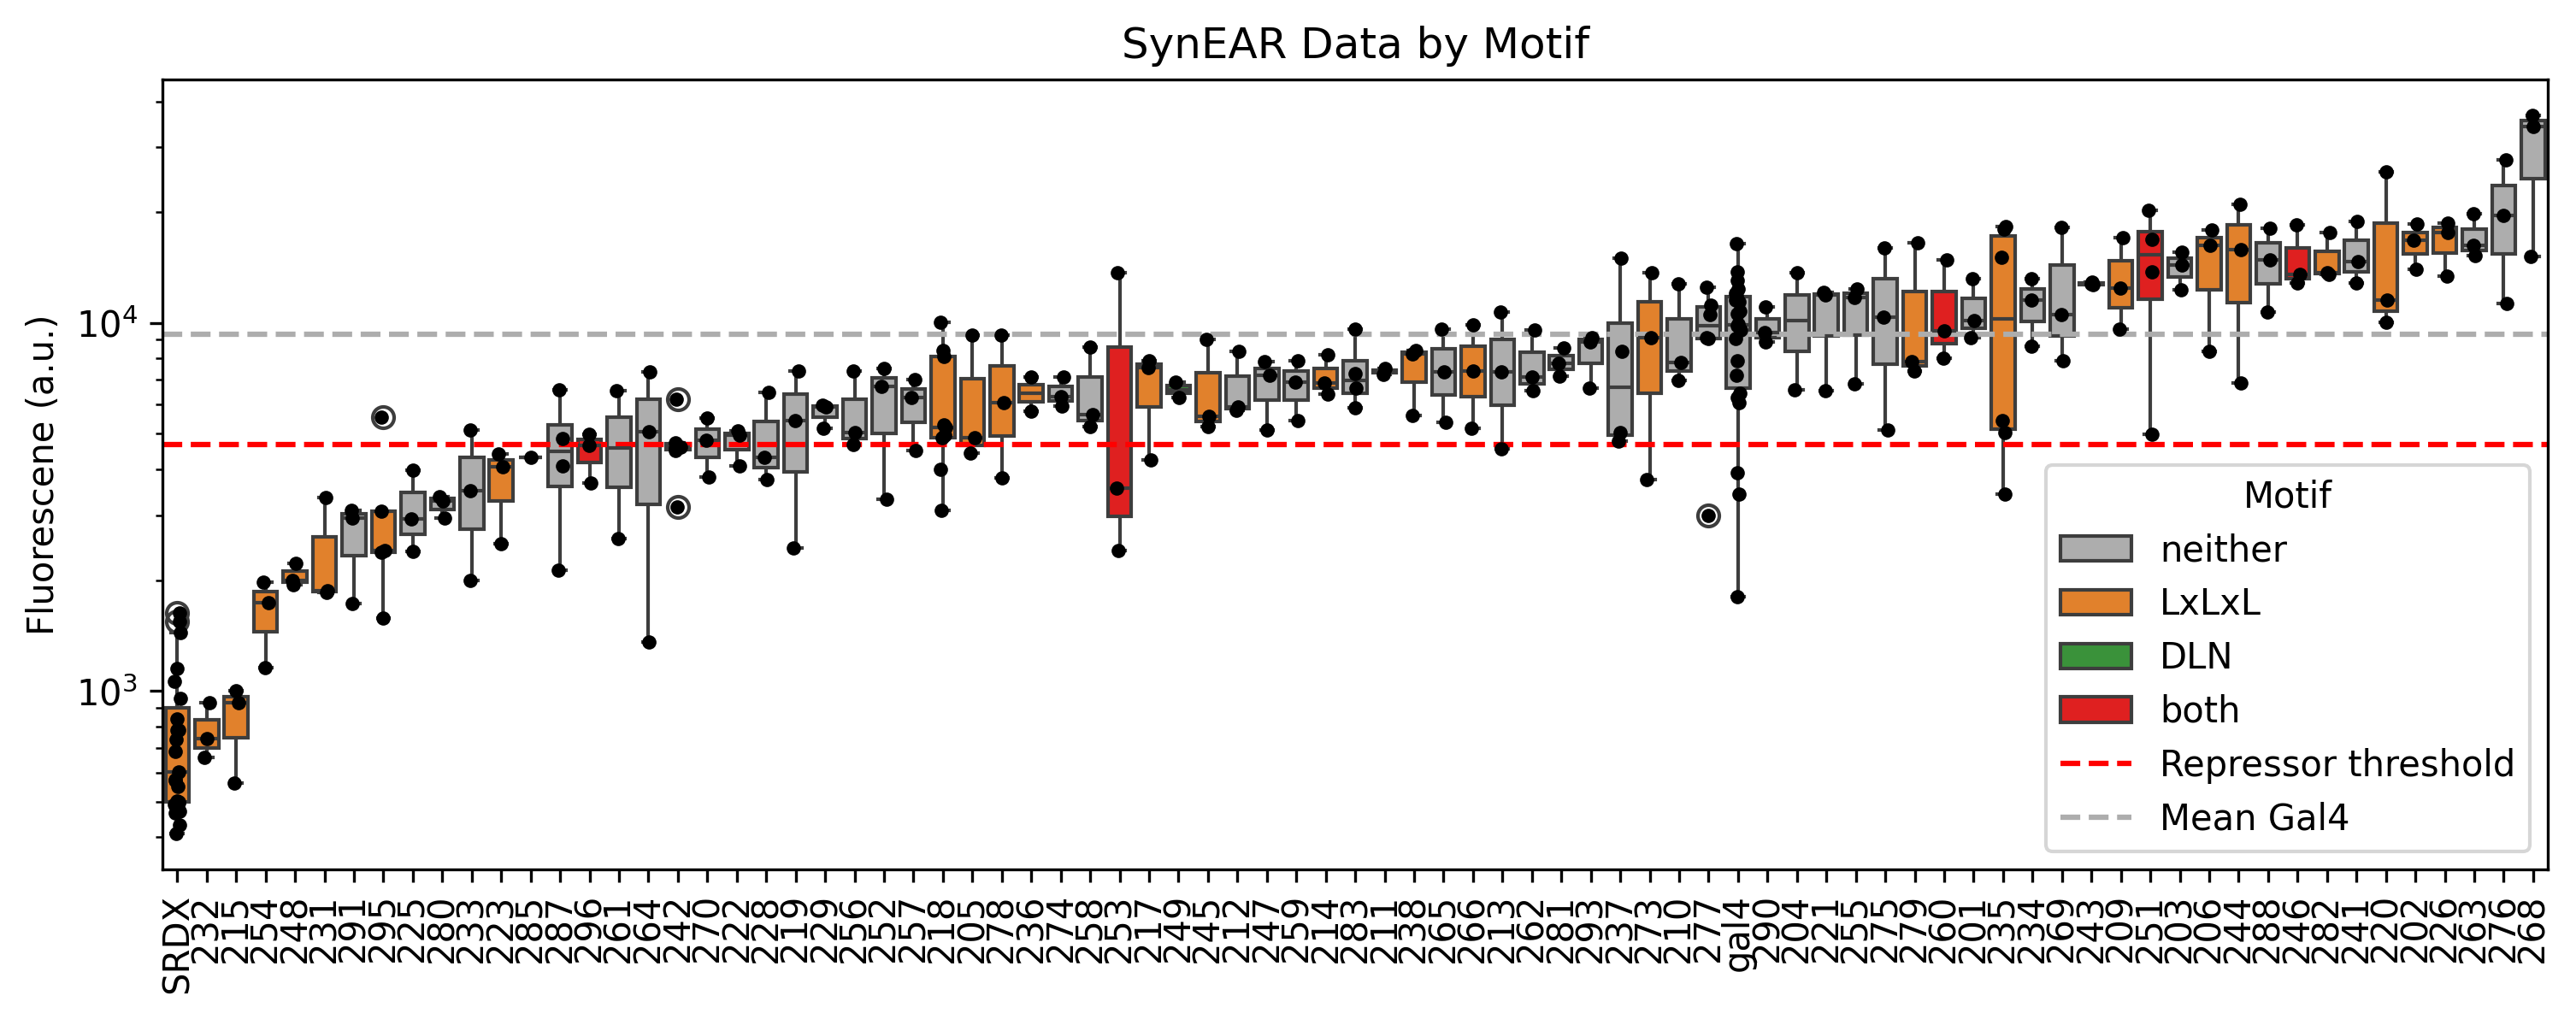

In [ ]:
# Plotting more simple SynEAR results
# Plotting SynEAR data by motif composition
motif_palette = {
    'LxLxL': '#ff7f0e',    # orange
    'DLN': '#2ca02c',    # green
    'neither': '#adadad',      # Gray
    'both': '#ff0000'      # red
}

#['#adadad', '#ff7f0e', '#2ca02c', '#d62728']

# Calculate the order for the x-axis based on the mean of 'green_blanked'
order = SynEAR.groupby('construct_true')['green_blanked'].mean().sort_values().index

plt.figure(figsize=(12, 4), dpi = 300)

# Box plot with color based on motif
sns.boxplot(x='construct_true', y='green_blanked', hue='motif', data=SynEAR, order=order,
            palette=motif_palette)

# Optional: Add scatter plot for the raw data points on top
sns.stripplot(x='construct_true', y='green_blanked', data=SynEAR, order=order, color='black', size=4, jitter=True)

# Adding horizontal lines for the medians with specified colors
#plt.axhline(median_srdx, color='#ff0000', linestyle='--', label='Mean SRDX', linewidth=1.5)  # Red
plt.axhline((0.5*median_gal4), color='#ff0000', linestyle='--', label='Repressor threshold', linewidth=1.5)  # new version for rep thresh

plt.axhline(median_gal4, color='#adadad', linestyle='--', label='Mean Gal4', linewidth=1.5)  # Light Gray

# Customize the legend and labels
plt.title('SynEAR Data by Motif')
plt.xlabel('')
plt.ylabel('Fluorescene (a.u.)')
plt.xticks(rotation=90)  # Rotate x-labels if they overlap

# Ensure the legend shows only unique entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Motif')
#plt.legend().remove()

plt.yscale('log')
plt.show()

In [ ]:
# Plotting SynEAR by thresholds
gal4_avg = SynEAR[SynEAR['construct_true'] == 'gal4']['green_blanked'].mean()
print(gal4_avg)

# Step 2: Calculate the average 'green_blanked' per 'construct_true'
avg_green_blanked = SynEAR.groupby('construct_true')['green_blanked'].mean()


# Step 3: Function to categorize based on the calculated averages
def categorize(construct, avg):
    if construct in ['']:  #gal4', 'SRDX' in case want to call them out specifically
        return 'control'
    #elif avg > 2.5 * gal4_avg:
      #  return 'activator'
    elif avg < 0.5 * gal4_avg:
        return 'repressor'
    else:
        return 'neutral'

# Step 4: Apply the function to create a new column
SynEAR['category'] = SynEAR.apply(lambda row: categorize(row['construct_true'], avg_green_blanked[row['construct_true']]), axis=1)

# Display the modified DataFrame
print(SynEAR[['construct_true', 'green_blanked', 'category']])

unique_counts = SynEAR.groupby('category')['construct_true'].nunique()
print(unique_counts)

# Statistical significance thresholding version
# We can use this to get a better idea of what thresholds we should choose
# Plot this in supplement
SynEAR_cleaned = SynEAR[SynEAR['green_blanked'].notna()]

# Isolate 'gal4' data for comparison
gal4_data = SynEAR_cleaned[SynEAR_cleaned['construct_true'] == 'gal4']['green_blanked']

def compare_to_gal4(construct):
    if construct in ['gal4', 'SRDX']:
        return 'control'
    else:
        construct_data = SynEAR_cleaned[SynEAR_cleaned['construct_true'] == construct]['green_blanked']

        # Perform the Mann-Whitney U test
        stat, p_value = mannwhitneyu(gal4_data, construct_data, alternative='two-sided')

        # Determine categories based on p-value and median comparison
        if p_value < 0.05:  # using a 5% significance level
            if construct_data.median() > gal4_data.median():
                return 'activator'
            else:
                return 'repressor'
        else:
            return 'neutral'

# Apply the comparison function across unique constructs
constructs = SynEAR_cleaned['construct_true'].unique()
construct_category_map = {construct: compare_to_gal4(construct) for construct in constructs}

# Map the results back to the DataFrame
SynEAR['stat_category'] = SynEAR['construct_true'].map(construct_category_map)


9331.732954545454
    construct_true  green_blanked   category
0              201       9133.250    neutral
1              201      10165.750    neutral
2              201      13193.125    neutral
3              202      14018.500    neutral
4              202      16769.125    neutral
..             ...            ...        ...
292           SRDX       1058.875  repressor
293           SRDX       1151.375  repressor
294           SRDX       1441.000  repressor
295           SRDX       1546.250  repressor
296           SRDX       1626.125  repressor

[296 rows x 3 columns]
category
neutral      63
repressor    18
Name: construct_true, dtype: int64


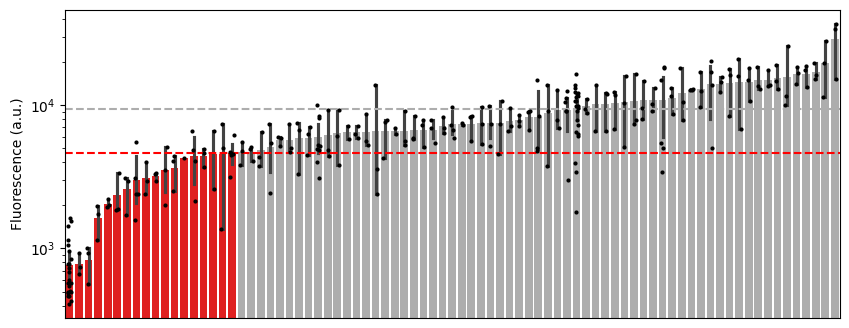

In [ ]:
# Plotting SynEARs by threshold
categories = SynEAR['category'].unique()
colors_hex = ['#adadad', '#ff0000']
if len(categories) > len(colors_hex):
    extra_colors = sns.color_palette(n_colors=len(categories) - len(colors_hex))
    colors_hex.extend(extra_colors[:len(categories) - len(colors_hex)])

category_color_map = {category: color for category, color in zip(categories, colors_hex)}

plt.figure(figsize=(10, 4))

# Order 'construct_true' by the mean 'green_blanked'
order = SynEAR.groupby('construct_true')['green_blanked'].mean().sort_values().index

# Box plot colored by 'category'
sns.barplot(x='construct_true', y='green_blanked', hue='category', data=SynEAR,
            palette=category_color_map, order=order)

# Scatter overlay
sns.stripplot(x='construct_true', y='green_blanked', data=SynEAR, color='black',
              jitter=0.2, size=3, order=order)

# Adding horizontal lines for the medians with specified colors
# plt.axhline(median_srdx, color='#ff0000', linestyle='--', label='Mean SRDX', linewidth=1.5)  # Red - old version for SRDX
plt.axhline((0.5*median_gal4), color='#ff0000', linestyle='--', label='Repressor threshold', linewidth=1.5)  # new version for rep thresh
plt.axhline(median_gal4, color='#adadad', linestyle='--', label='Mean Gal4', linewidth=1.5)  # Light Gray

plt.title('') # SynEARs by threshold
plt.xlabel('') # Construct
plt.legend().remove()
plt.ylabel('Fluorescence (a.u.)')
# plt.xticks(rotation=90)
plt.xticks([])
plt.yscale('log')
plt.show()

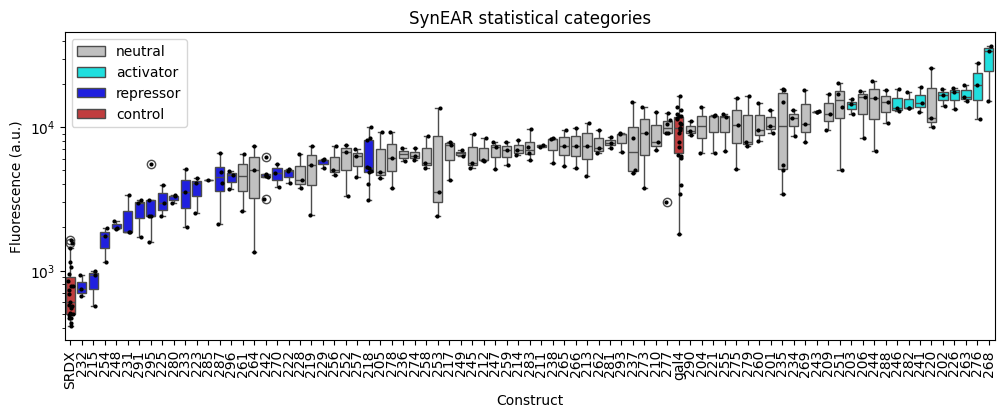

In [ ]:
# Plotting SynEARs by statistical stat_category
categories = SynEAR['stat_category'].unique()
colors_hex = ['#c0c0c0', '#00ffff', '#0000ff', '#d62728']
if len(categories) > len(colors_hex):
    extra_colors = sns.color_palette(n_colors=len(categories) - len(colors_hex))
    colors_hex.extend(extra_colors[:len(categories) - len(colors_hex)])

stat_category_color_map = {stat_category: color for stat_category, color in zip(categories, colors_hex)}

plt.figure(figsize=(12, 4))

# Order 'construct_true' by the mean 'green_blanked'
order = SynEAR.groupby('construct_true')['green_blanked'].mean().sort_values().index

# Box plot colored by 'stat_category'
sns.boxplot(x='construct_true', y='green_blanked', hue='stat_category', data=SynEAR,
            palette=stat_category_color_map, order=order)

# Scatter overlay
sns.stripplot(x='construct_true', y='green_blanked', data=SynEAR, color='black',
              jitter=0.2, size=3, order=order)

plt.title('SynEAR statistical categories')
plt.xlabel('Construct')
plt.ylabel('Fluorescence (a.u.)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [ ]:
# Sequence identity calculations
# Loading data for two strongest SynEARs and SRDX
SynEAR_sequences = {
    'construct_name': ['TR232', 'TR215', 'SRDX'],
    'sequence': ['ldlrlglpaldlrlg', 'lnqldlelrlnqld', 'ldldlelrlgfa']
}

df_SynEAR_seq = pd.DataFrame(SynEAR_sequences) # named version
df_SynEAR_seq.head()

,construct_name,sequence
0,TR232,ldlrlglpaldlrlg
1,TR215,lnqldlelrlnqld
2,SRDX,ldldlelrlgfa


In [ ]:
# calculating sequence identity
def sequence_identity(seq1, seq2):
    """
    Calculate the sequence identity between two sequences.
    :param seq1: First sequence
    :param seq2: Second sequence
    :return: Identity score (0 to 1)
    """
    # Find the length of the shortest sequence to compare
    min_len = min(len(seq1), len(seq2))

    # Count the number of matching positions
    match_count = sum(1 for i in range(min_len) if seq1[i] == seq2[i])

    # Calculate the identity as the proportion of matching positions
    return match_count / min_len

def pairwise_sequence_identity(df_SynEAR_seq):
    """
    Calculate the pairwise sequence identity for the 'sequence' variable in the DataFrame.
    :param df_SynEAR_seq: DataFrame containing 'sequence' column
    :return: Matrix of pairwise sequence identity
    """
    sequences = df_SynEAR_seq['sequence'].tolist()
    num_sequences = len(sequences)

    identity_matrix = np.zeros((num_sequences, num_sequences))

    # Calculate pairwise identity for each pair of sequences
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = sequence_identity(sequences[i], sequences[j])
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity

    return pd.DataFrame(identity_matrix, columns=df_SynEAR_seq['construct_name'], index=df_SynEAR_seq['construct_name'])

# Calculate the pairwise sequence identity
identity_df = pairwise_sequence_identity(df_SynEAR_seq)
print(identity_df)

construct_name     TR232     TR215      SRDX
construct_name                              
TR232           1.000000  0.142857  0.416667
TR215           0.142857  1.000000  0.083333
SRDX            0.416667  0.083333  1.000000


In [ ]:
#  Modeling accuracy of SynEAR predictions
# Dropping the 'control' constructs, keeping only predicted strength classes

SynEAR_model = SynEAR.loc[SynEAR['strength_class'] != 'control']

#Choosing optimal thresholds


def find_optimal_thresholds(data, true_labels):
    # Clean data: Remove NaN values
    clean_data = data.dropna()

    # Setup initial guesses based on quartiles to ensure they are spread appropriately
    initial_thresholds = sorted(np.percentile(clean_data, [25, 50, 75]))

    # Function to categorize values based on thresholds
    def categorize_values(thresholds):
        categories = pd.cut(clean_data, bins=[-np.inf] + list(thresholds) + [np.inf], labels=["weak", "moderate", "strong", "strongest"])
        return categories

    # Calculate negative accuracy
    def calc_neg_accuracy(thresholds):
        labels_pred = categorize_values(thresholds)
        return -accuracy_score(true_labels.loc[clean_data.index], labels_pred)  # Match indices after dropna()

    # Sequential threshold optimization
    def optimize_thresholds(init_thresholds):
        optimized_thresholds = init_thresholds[:]
        for i in range(len(init_thresholds)):
            lower_bound = optimized_thresholds[i-1] if i > 0 else clean_data.min()
            upper_bound = optimized_thresholds[i+1] if i < (len(init_thresholds)-1) else clean_data.max()
            if lower_bound < upper_bound:  # Ensure valid bounds
                result = minimize_scalar(lambda x: calc_neg_accuracy(optimized_thresholds[:i] + [x] + optimized_thresholds[i+1:]),
                                         bounds=(lower_bound, upper_bound),
                                         method='bounded')
                if result.success:
                    optimized_thresholds[i] = result.x
                else:
                    raise Exception(f"Optimization failed at index {i} with bounds ({lower_bound}, {upper_bound})")
            else:
                raise ValueError(f"Invalid bounds [{lower_bound}, {upper_bound}] at index {i}")
        return optimized_thresholds

    return optimize_thresholds(initial_thresholds)

# Defining thresholds
optimal_green_thresholds = find_optimal_thresholds(SynEAR_model['green_blanked'], SynEAR_model['strength_class'])
print("Optimal green thresholds:", optimal_green_thresholds)

optimal_red_thresholds = find_optimal_thresholds(SynEAR_model['red_blanked'], SynEAR_model['strength_class'])
print("Optimal red thresholds:", optimal_red_thresholds)

optimal_ratio_thresholds = find_optimal_thresholds(SynEAR_model['green_red_ratio'], SynEAR_model['strength_class'])
print("Optimal ratio thresholds:", optimal_ratio_thresholds)

optimal_rep_ratio_thresholds = find_optimal_thresholds(SynEAR_model['repression_ratio'], SynEAR_model['strength_class'])
print("Optimal repression ratio thresholds:", optimal_rep_ratio_thresholds)

optimal_invert_rep_ratio_thresholds = find_optimal_thresholds(SynEAR_model['invert_rep_ratio'], SynEAR_model['strength_class'])
print("Optimal invert rep ratio thresholds:", optimal_invert_rep_ratio_thresholds)



Optimal green thresholds: [4843.005591228442, 8696.630662926138, 30098.0871043623]
Optimal red thresholds: [502.84293731333094, 1038.1683672722743, 2810.1223322209285]
Optimal ratio thresholds: [6.2012178668984195, 11.47083517657675, 13.106656360767179]
Optimal repression ratio thresholds: [0.5189876661959548, 0.9319474928721667, 3.225354932770726]
Optimal invert rep ratio thresholds: [0.37118340050355275, 1.3350420378043253, 6.890773084136302]


In [ ]:
# Generating confusion matrices

def categorize_strength(value, thresholds):
    if value < thresholds[0]:
        return 'weak'
    elif value < thresholds[1]:
        return 'moderate'
    elif value < thresholds[2]:
        return 'strong'
    else:
        return 'strongest'

# Define your thresholds
thresholds_green = optimal_green_thresholds # optimized thresholds green
thresholds_red = [259.55034738498324, 552.3413705935939, 2610.8294611250267] # optimized thresholds for red
thresholds_ratio = [6.181297361281594, 14.254757509316702, 36.15600566570992] # Example thresholds

thresholds_rep_ratio = [0.5189876661959548, 0.9319474928721667, 3.225354932770726]
thresholds_invert_rep_ratio = [0.37118340050355275, 1.3350420378043253, 6.890773084136302]

# Apply the categorization to your measurements columns
SynEAR_model['green_category'] = SynEAR_model['green_blanked'].apply(lambda x: categorize_strength(x, thresholds_green))
SynEAR_model['red_category'] = SynEAR_model['red_blanked'].apply(lambda x: categorize_strength(x, thresholds_red))
SynEAR_model['ratio_category'] = SynEAR_model['green_red_ratio'].apply(lambda x: categorize_strength(x, thresholds_ratio))
SynEAR_model['rep_ratio_category'] = SynEAR_model['repression_ratio'].apply(lambda x: categorize_strength(x, thresholds_ratio))
SynEAR_model['invert_rep_ratio_category'] = SynEAR_model['invert_rep_ratio'].apply(lambda x: categorize_strength(x, thresholds_ratio))

<ipython-input-20-401e75aa33d7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SynEAR_model['green_category'] = SynEAR_model['green_blanked'].apply(lambda x: categorize_strength(x, thresholds_green))
<ipython-input-20-401e75aa33d7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SynEAR_model['red_category'] = SynEAR_model['red_blanked'].apply(lambda x: categorize_strength(x, thresholds_red))
<ipython-input-20-401e75aa33d7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Classification Report for green_category:
              precision    recall  f1-score   support

        weak       0.34      0.35      0.35        65
    moderate       0.32      0.48      0.38        63
      strong       0.32      0.43      0.37        65
   strongest       0.00      0.00      0.00        58

    accuracy                           0.32       251
   macro avg       0.25      0.32      0.27       251
weighted avg       0.25      0.32      0.28       251



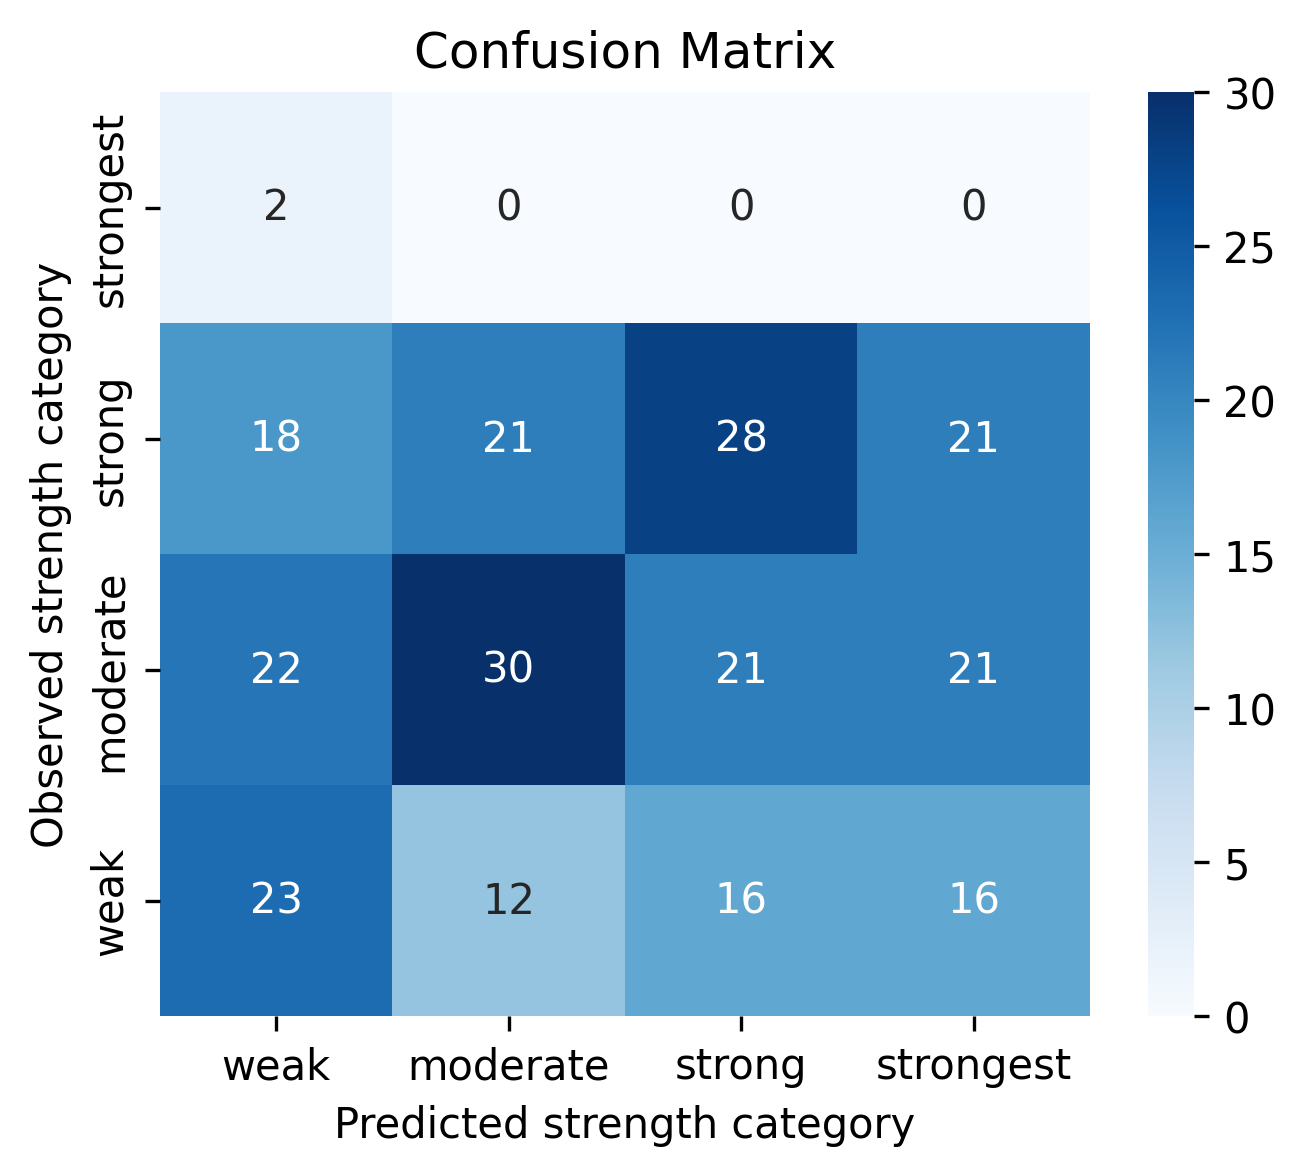

Classification Report for ratio_category:
              precision    recall  f1-score   support

        weak       0.34      0.34      0.34        65
    moderate       0.31      0.59      0.41        63
      strong       0.19      0.20      0.20        65
   strongest       1.00      0.02      0.03        58

    accuracy                           0.29       251
   macro avg       0.46      0.29      0.24       251
weighted avg       0.45      0.29      0.25       251



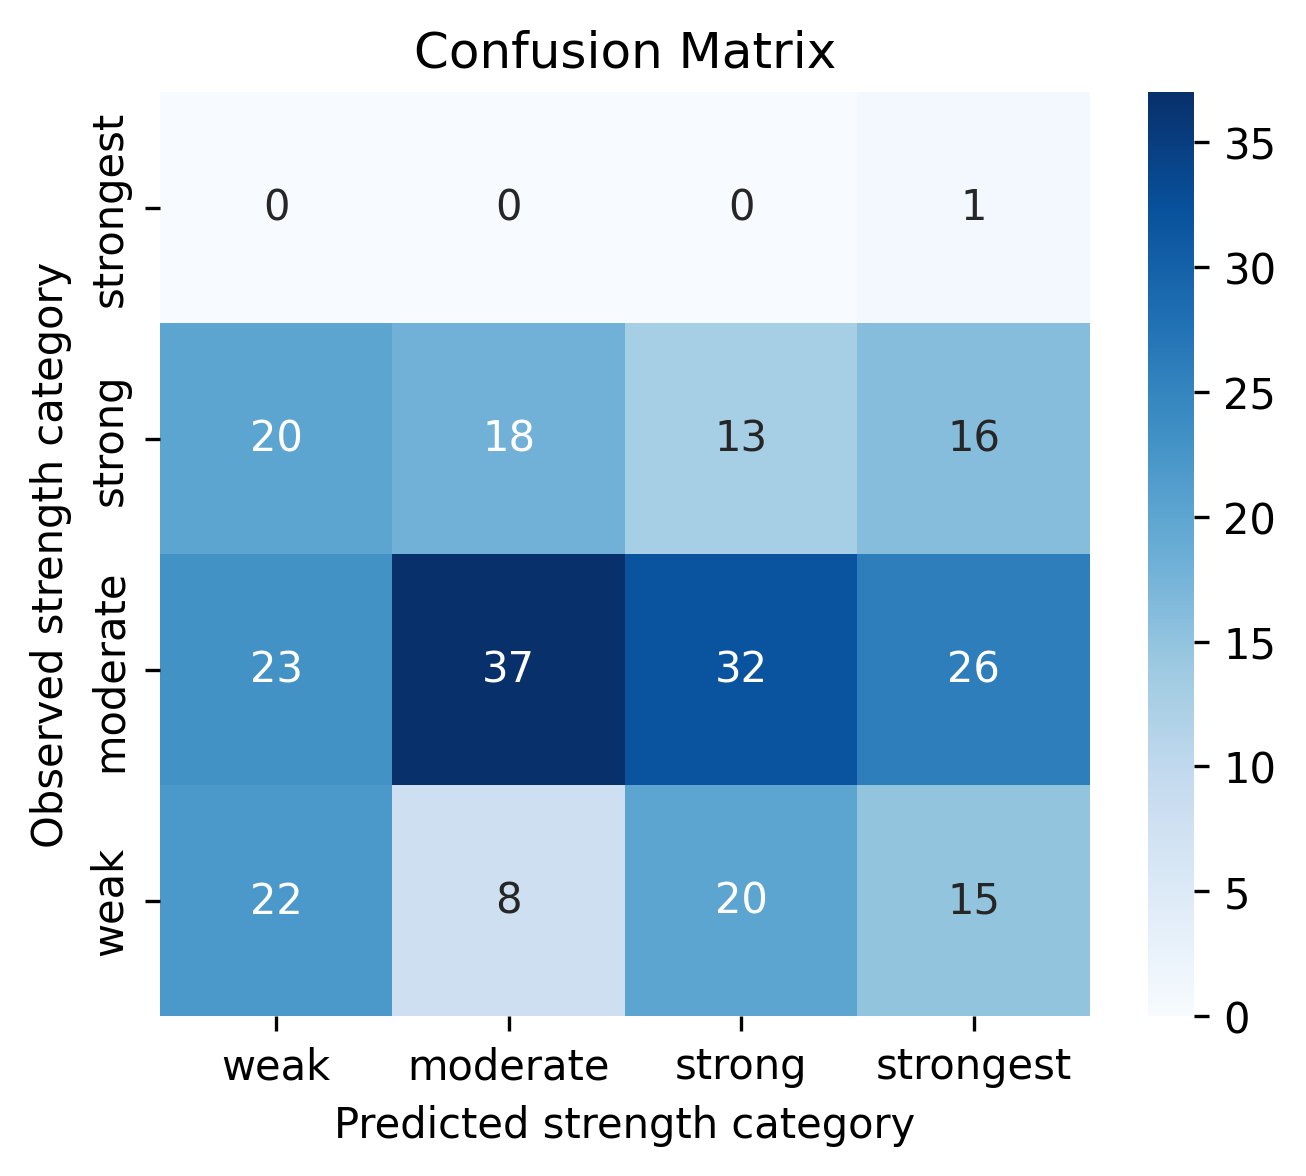

In [ ]:
# Plotting confusion matrices
def plot_confusion_matrix( predicted_values, true_values, title):
    labels = ["weak", "moderate", "strong", "strongest"]
    matrix = confusion_matrix(true_values, predicted_values, labels=labels)
    plt.figure(figsize=(5, 4), dpi = 300)
    sns_heatmap = sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues",
                              xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted strength category')
    plt.ylabel('Observed strength category')
    plt.title(title)
    sns_heatmap.invert_yaxis()  # Invert the Y axis to show 'strongest' at the top
    plt.show()

# Print classification report and plot confusion matrix for each category
for category in ['green_category', 'ratio_category']:   # other cataegories: 'rep_ratio_category', 'invert_rep_ratio_category'
    print(f"Classification Report for {category}:")
    print(classification_report(SynEAR_model['strength_class'], SynEAR_model[category], labels=["weak", "moderate", "strong", "strongest"]))
    plot_confusion_matrix(SynEAR_model['strength_class'], SynEAR_model[category], f"Confusion Matrix")

Permutation robustness check
Actual Model Accuracy: 0.3227
Permutation Test Mean/STD: 0.2557/0.0267
Std Devs Above Mean (Perm): 2.5087833279080516
One-Tailed P-Value (Perm): 0.00605738847397238
Percent of permuted models we outperform: 99.39426115260275

Random prediction bootstrapping robustness check
Random Prediction Mean/STD: 0.2502/0.0269
Std Devs Above Mean (Random): 2.697792820947033
One-Tailed P-Value (Random): 0.0034900433251616432
Percent of boostrap models we outperform: 99.65099566748383


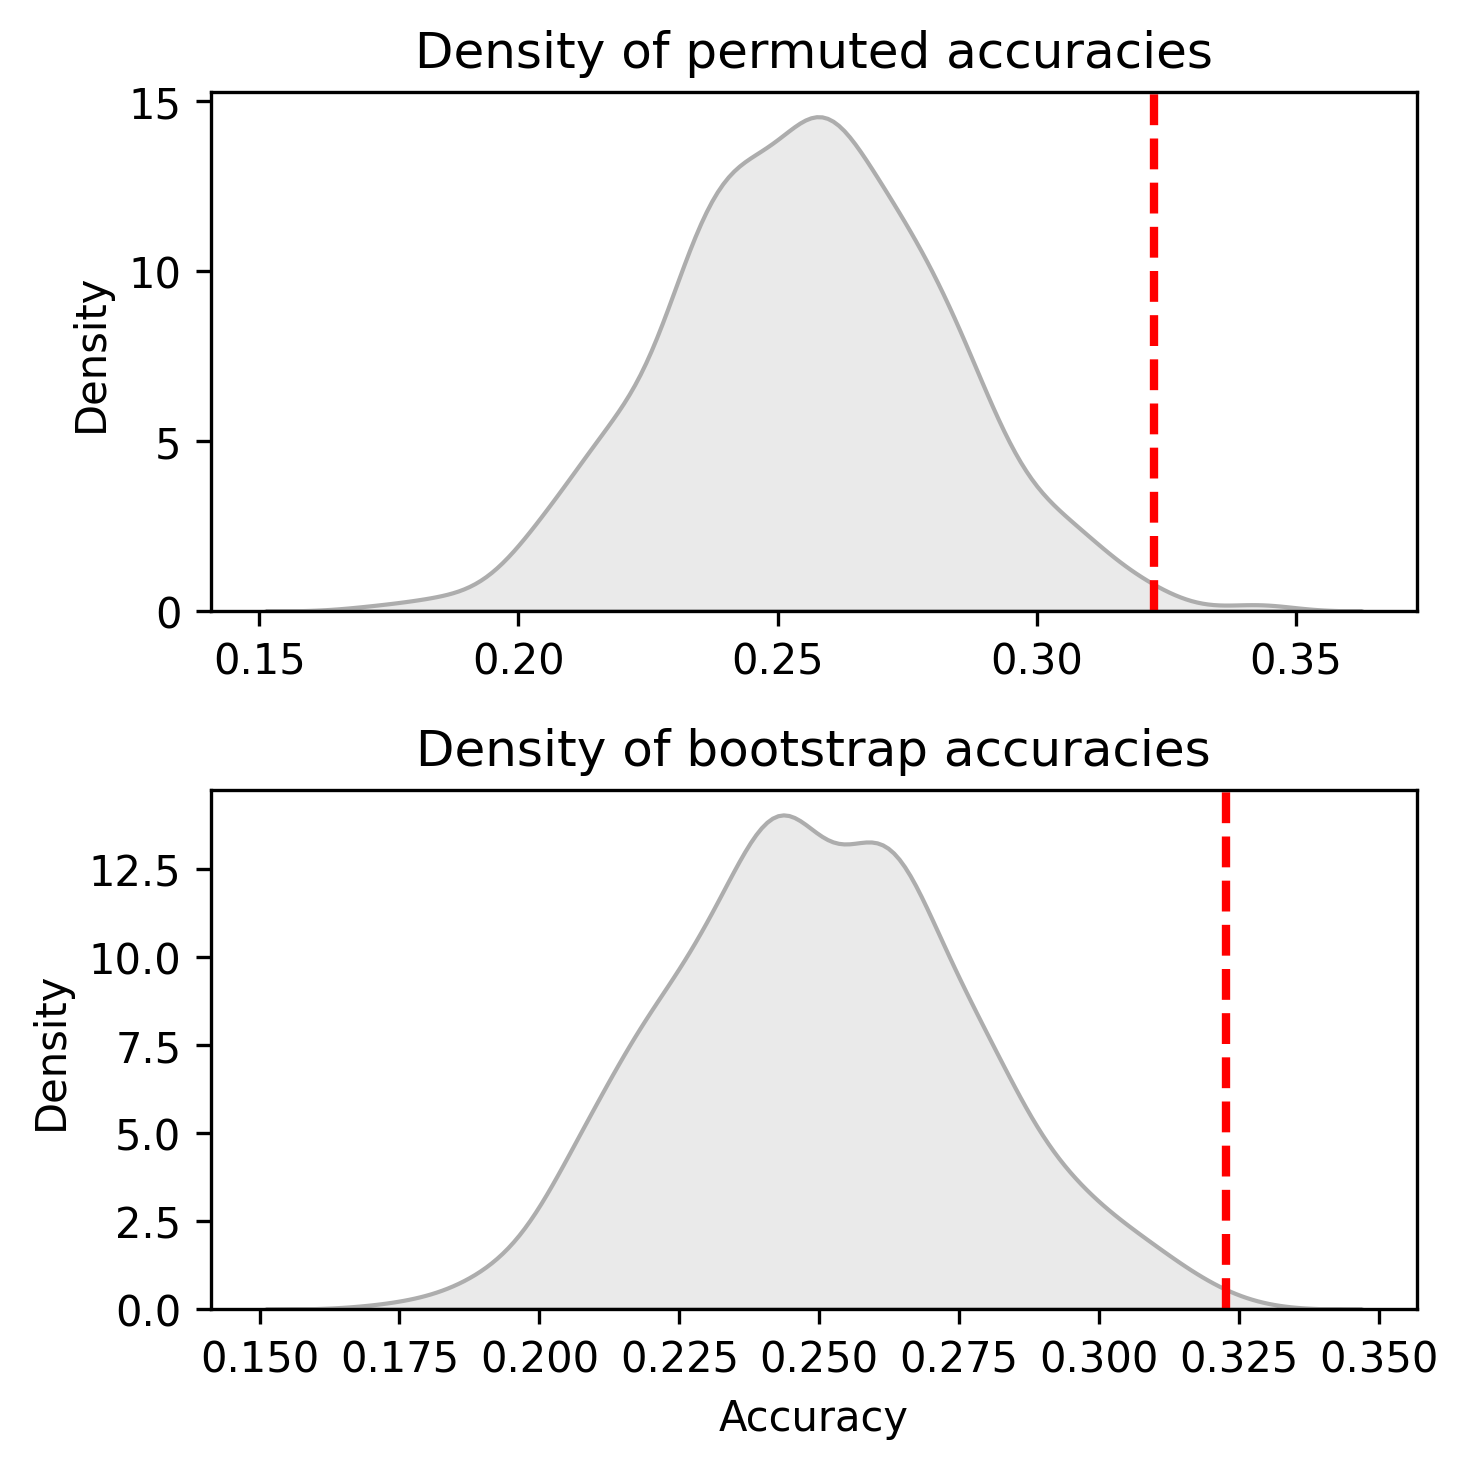

In [ ]:
# Enhanced function for permutation checking
def permutation_test_accuracy(y_true, y_preds, n_permutations=1000):
    accuracies = []
    for _ in range(n_permutations):
        shuffled_labels = shuffle(y_true)
        accuracy = accuracy_score(shuffled_labels, y_preds)
        accuracies.append(accuracy)
    return accuracies

# Random predictions for comparison
def random_predictions_evaluation(y_true, n_iterations=1000):
    unique_classes = np.unique(y_true)
    probabilities = y_true.value_counts(normalize=True).reindex(unique_classes, fill_value=0).values
    bootstrap_accuracies = []
    for _ in range(n_iterations):
        random_preds = np.random.choice(unique_classes, size=len(y_true), p=probabilities)
        bootstrap_accuracies.append(accuracy_score(y_true, random_preds))
    return bootstrap_accuracies

# Common setup
actual_accuracy = accuracy_score(SynEAR_model['strength_class'], SynEAR_model['green_category'])

# Permutation test
accuracies_perm = permutation_test_accuracy(SynEAR_model['strength_class'], SynEAR_model['green_category'])
perm_mean = np.mean(accuracies_perm)
perm_std = np.std(accuracies_perm)
std_above_perm_mean = (actual_accuracy - perm_mean) / perm_std

# Random prediction test
bootstrap_accuracies = random_predictions_evaluation(SynEAR_model['strength_class'])
average_bootstrap_accuracy = np.mean(bootstrap_accuracies)
std_deviation = np.std(bootstrap_accuracies)
std_above_bootstrap_mean = (actual_accuracy - average_bootstrap_accuracy) / std_deviation

# Displaying results
print("Permutation robustness check")
print(f"Actual Model Accuracy: {actual_accuracy:.4f}")
print(f"Permutation Test Mean/STD: {perm_mean:.4f}/{perm_std:.4f}")
print(f"Std Devs Above Mean (Perm): {std_above_perm_mean}")
print(f"One-Tailed P-Value (Perm): {norm.sf(std_above_perm_mean)}")
print("Percent of permuted models we outperform:", 100 * (1 - norm.sf(std_above_perm_mean)))
print("")
print("Random prediction bootstrapping robustness check")
print(f"Random Prediction Mean/STD: {average_bootstrap_accuracy:.4f}/{std_deviation:.4f}")
print(f"Std Devs Above Mean (Random): {std_above_bootstrap_mean}")
print(f"One-Tailed P-Value (Random): {norm.sf(std_above_bootstrap_mean)}")
print("Percent of boostrap models we outperform:", 100 * (1 - norm.sf(std_above_bootstrap_mean)))

# Plots
fig, axes = plt.subplots(2, 1, figsize=(5, 5), dpi = 300)
sns.kdeplot(accuracies_perm, color='#adadad', fill=True, label='Permutation Distributions', ax=axes[0])
axes[0].axvline(x=actual_accuracy, color='red', linestyle='--', linewidth=2, label='Actual Model Accuracy')
axes[0].set_title('Density of permuted accuracies')
#axes[0].legend()

sns.kdeplot(bootstrap_accuracies, color="#adadad", fill=True, label='Bootstrap Distributions', ax=axes[1])
axes[1].axvline(x=actual_accuracy, color='red', linestyle='--', linewidth=2, label='Actual Model Accuracy')
axes[1].set_title('Density of bootstrap accuracies')
axes[1].set_xlabel('Accuracy')
axes[1].set_ylabel('Density')
#axes[1].legend()

plt.tight_layout()  # Adjust subplots to give some spacing
plt.show()


In [ ]:
# NonEAR section - stats

gal4_avg = NonEAR[NonEAR['construct_true'] == 'gal4']['green_blanked'].mean()
print(gal4_avg)

# Step 2: Calculate the average 'green_blanked' per 'construct_true'
avg_green_blanked = NonEAR.groupby('construct_true')['green_blanked'].mean()


# Step 3: Function to categorize based on the calculated averages
def categorize(construct, avg):
    if construct in []: # 'gal4', 'SRDX' - no longer have a distinct category for controls
        return 'control'
    elif avg > 2 * gal4_avg:
        return 'activator'
    elif avg < 0.5 * gal4_avg:
        return 'repressor'
    else:
        return 'neutral'

# Step 4: Apply the function to create a new column
NonEAR['category'] = NonEAR.apply(lambda row: categorize(row['construct_true'], avg_green_blanked[row['construct_true']]), axis=1)

# Display the modified DataFrame
print(NonEAR[['construct_true', 'green_blanked', 'category']])

# prompt: Split the dataframe into two overlapping sections by rows using the 'domain' variable. One new NonEAR contains 'domain' levels "control' and "Non EAR", the other new NonEAR contains the 'domain' levels 'control' and 'EAR Fusion'

NonEAR_only = NonEAR[NonEAR['domain'].isin(['control', 'Non EAR'])]
EAR_fusions = NonEAR[NonEAR['domain'].isin(['control', 'EAR fusion'])]


98339.70833333333
    construct_true  green_blanked   category
0          109_109      17118.375  repressor
1          109_109       4618.000  repressor
2          109_109      11581.375  repressor
3          109_109       8934.875  repressor
4          109_109      13468.875  repressor
..             ...            ...        ...
210           runt      57152.875    neutral
211           runt      72386.250    neutral
212           runt      96367.625    neutral
213           runt      75976.500    neutral
214           runt      56670.250    neutral

[215 rows x 3 columns]


In [ ]:
# Code for NonEAR and EAR fusion plots


# Step 1: Calculate the average 'green_blanked' per 'construct_true' for NonEAR
avg_green_blanked = NonEAR.groupby('construct_true')['green_blanked'].mean()

# Function to categorize based on the calculated averages
def categorize(construct, avg):
    if construct in ['gal4', 'SRDX']:  # assuming categories for illustrative purposes
        return 'control'
    elif avg > 2 * gal4_avg:
        return 'activator'
    elif avg < 0.5 * gal4_avg:
        return 'repressor'
    else:
        return 'neutral'

# Set global legend parameters and figure layout
plt.figure(figsize=(12, 6), dpi=300)
colors_hex = ['#ff0000', '#adadad']  # Example: Red & Grey
palette = sns.color_palette(colors_hex)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [3, 1]})


# ====================== NonEAR_only ======================
# Order by mean 'green_blanked' and plot
order = NonEAR_only.groupby('construct_true')['green_blanked'].mean().sort_values().index
sns.barplot(ax=ax1, x='construct_true', y='green_blanked', hue='category', data=NonEAR_only,
            palette=palette, order=order)

# Calculate and add median lines based on colors
median_srdx = NonEAR_only[NonEAR_only['construct_true'] == 'SRDX']['green_blanked'].mean()
median_gal4 = NonEAR_only[NonEAR_only['construct_true'] == 'gal4']['green_blanked'].mean()
ax1.axhline(y=(0.5*median_gal4), color='red', linestyle='--', label='Repressor threshold')
ax1.axhline(y=median_gal4, color='grey', linestyle='--', label='Mean Gal4')

ax1.set_title('NonEAR Repressors')
ax1.set_xlabel('Construct')
ax1.set_ylabel('Fluorescence (a.u.)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.legend().remove()
ax1.set_yscale('log')

# ====================== EAR_fusions ======================
# Order by mean and plot
order = EAR_fusions.groupby('construct_true')['green_blanked'].mean().sort_values().index
sns.barplot(ax=ax2, x='construct_true', y='green_blanked', hue='category', data=EAR_fusions,
            palette=palette, order=order)

# Calculate and add median lines based on colors
median_srdx = EAR_fusions[EAR_fusions['construct_true'] == 'SRDX']['green_blanked'].mean()
median_gal4 = EAR_fusions[EAR_fusions['construct_true'] == 'gal4']['green_blanked'].mean()
ax2.axhline(y=(0.5*median_gal4), color='red', linestyle='--', label='Repressor threshold')
ax2.axhline(y=median_gal4, color='grey', linestyle='--', label='Mean Gal4')

ax2.set_title('EAR fusions')
ax2.set_xlabel('Construct')
ax2.set_ylabel('Fluorescence (a.u.)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_yscale('log')

# Adjust layout and legend
plt.tight_layout()
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# Uncomment the next line to show the legend outside the plot.
# plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc=2)

ax2.legend().remove()

plt.show()



NameError: name 'NonEAR' is not defined

In [ ]:
# Tandem SRDX stats
gal4_avg = tandem_SRDX[tandem_SRDX['construct_true'] == 'gal4']['green_blanked'].mean()
print(gal4_avg)

# Step 2: Calculate the average 'green_blanked' per 'construct_true'
avg_green_blanked = tandem_SRDX.groupby('construct_true')['green_blanked'].mean()


# Step 3: Function to categorize based on the calculated averages
def categorize(construct, avg):
    if construct in []: # 'gal4', 'SRDX' - no longer have a distinct category for controls
        return 'control'
    elif avg > 2 * gal4_avg:
        return 'activator'
    elif avg < 0.5 * gal4_avg:
        return 'repressor'
    else:
        return 'neutral'

# Step 4: Apply the function to create a new column
tandem_SRDX['category'] = tandem_SRDX.apply(lambda row: categorize(row['construct_true'], avg_green_blanked[row['construct_true']]), axis=1)

# Display the modified DataFrame
print(tandem_SRDX[['construct_true', 'green_blanked', 'category']])

unique_counts = tandem_SRDX.groupby('category')['construct_true'].nunique()
print(unique_counts)

# more stats - looking for significant differences between groups
dunn = sp.posthoc_dunn(tandem_SRDX, val_col='green_blanked', group_col='construct_true', p_adjust='bonferroni')

# Extract p-values comparing to 'SRDX'
control_group = 'SRDX'
p_values_vs_srdx = dunn.loc[:, control_group] if control_group in dunn.columns else None

print("Pairwise comparisons to SRDX with Bonferroni adjustment:")
print(p_values_vs_srdx)

29021.104166666668
   construct_true  green_blanked   category
0            gal4      24688.500    neutral
1            gal4      35025.000    neutral
2            gal4      23284.750    neutral
3            gal4      34240.000    neutral
4            gal4      35849.375    neutral
5            gal4      21039.000    neutral
6            SRDX       1515.000  repressor
7            SRDX       1087.750  repressor
8            SRDX       1051.375  repressor
9            SRDX       1512.875  repressor
10           SRDX        737.375  repressor
11           SRDX       1089.875  repressor
12         2xSRDX       1111.000  repressor
13         2xSRDX        974.125  repressor
14         2xSRDX        993.625  repressor
15         2xSRDX        866.000  repressor
16         2xSRDX        590.875  repressor
17         2xSRDX       1231.250  repressor
18         3xSRDX      14956.125  repressor
19         3xSRDX      18243.750  repressor
20         3xSRDX      13793.125  repressor
21         3x

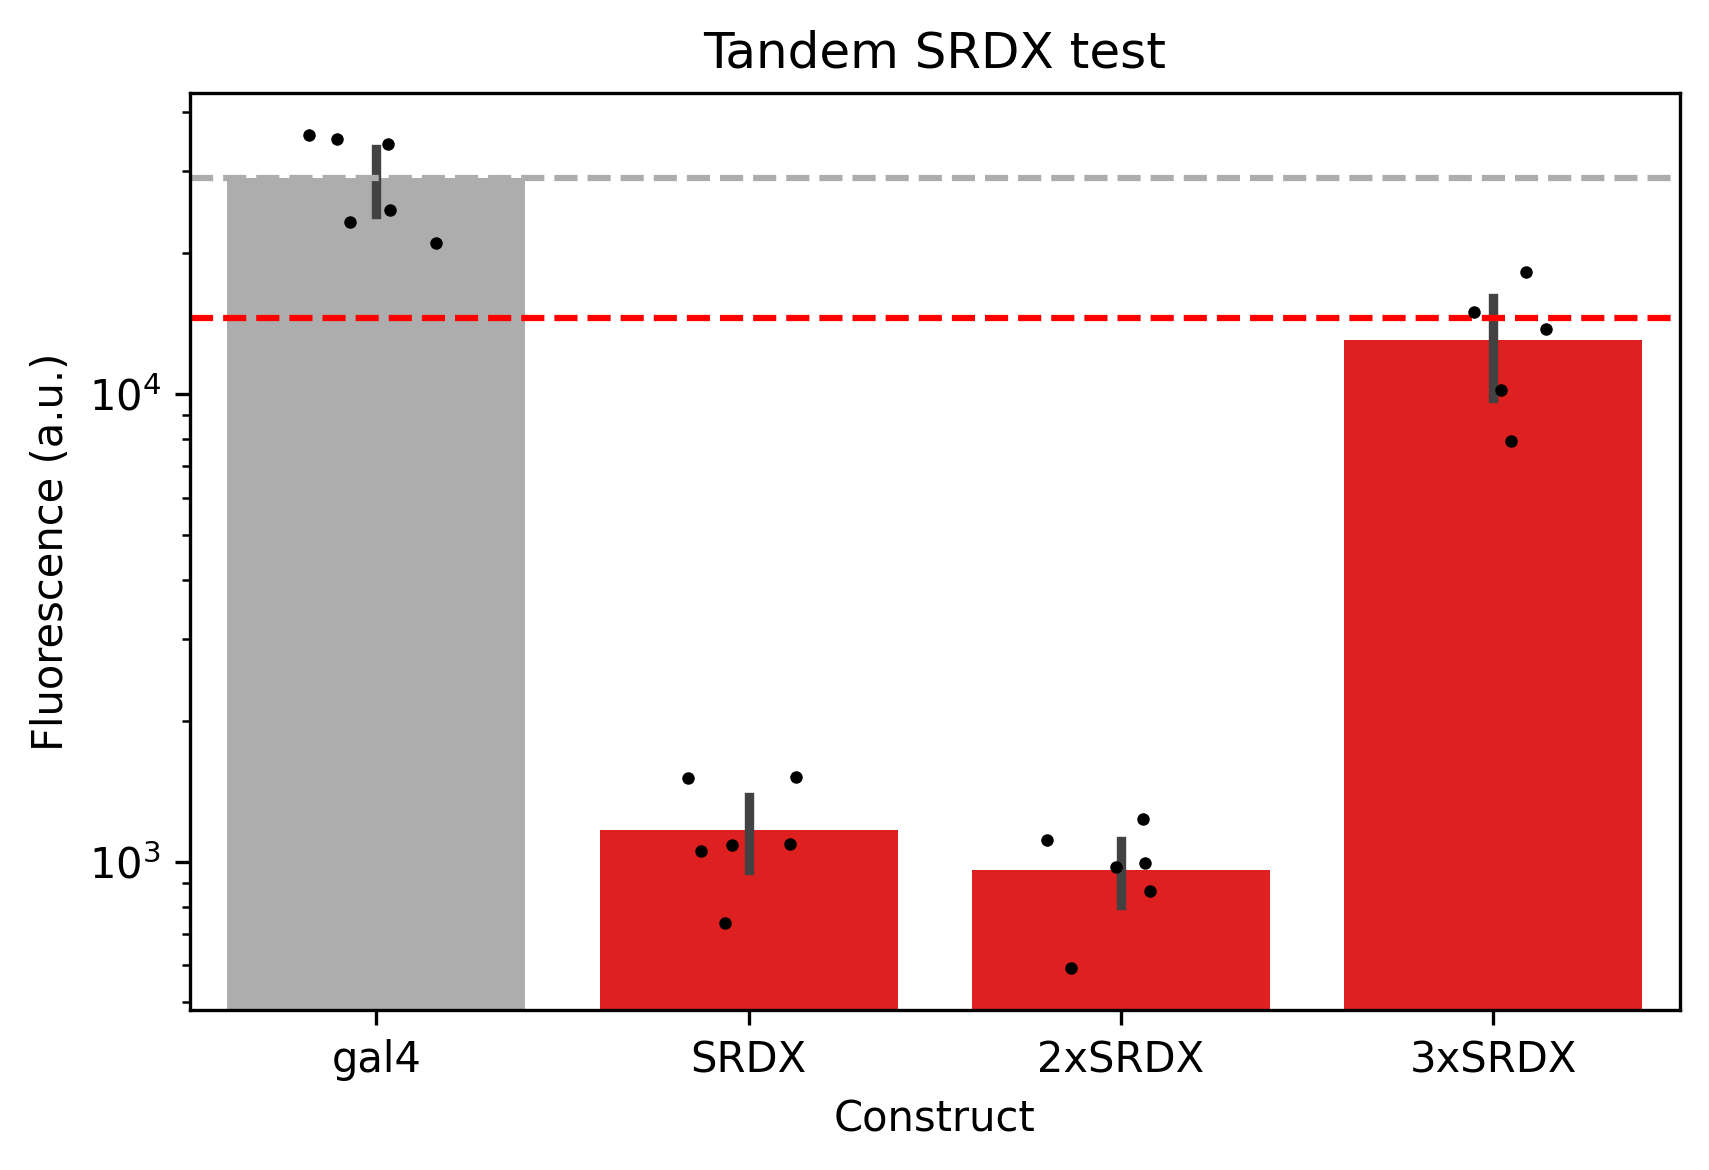

In [ ]:
# Tandem SRDX graphs
categories = tandem_SRDX['category'].unique()
colors_hex = ['#adadad', '#ff0000'] # controls first, repressors second, neutrals third
if len(categories) > len(colors_hex):
    extra_colors = sns.color_palette(n_colors=len(categories) - len(colors_hex))
    colors_hex.extend(extra_colors[:len(categories) - len(colors_hex)])

category_color_map = {category: color for category, color in zip(categories, colors_hex)}

plt.figure(figsize=(6, 4), dpi = 300)

# Order 'construct_true' by the mean 'green_blanked'
#order = tandem_SRDX.groupby('construct_true')['green_blanked'].mean().sort_values().index
order = ["gal4", "SRDX", "2xSRDX", "3xSRDX"]

# Bar plot colored by 'category'
sns.barplot(x='construct_true', y='green_blanked', hue='category', data=tandem_SRDX,
            palette=category_color_map, order=order)

sns.stripplot(x='construct_true', y='green_blanked', data=tandem_SRDX, color='black',
              jitter=0.2, size=3, order=order)

# Calculate medians for specific groups
median_srdx = tandem_SRDX[tandem_SRDX['construct_true'] == 'SRDX']['green_blanked'].mean()
median_gal4 = tandem_SRDX[tandem_SRDX['construct_true'] == 'gal4']['green_blanked'].mean()

# Adding horizontal lines for the medians with specified colors
#plt.axhline(median_srdx, color='#ff0000', linestyle='--', label='Mean SRDX', linewidth=1.5)  # old version for SRDX line
plt.axhline((0.5*median_gal4), color='#ff0000', linestyle='--', label='Repressor threshold', linewidth=1.5)  # new version for represor-threshold line
plt.axhline(median_gal4, color='#adadad', linestyle='--', label='Mean Gal4', linewidth=1.5)  # Light Gray

plt.title('Tandem SRDX test')
plt.xlabel('Construct')
plt.ylabel('Fluorescence (a.u.)')

# Remove x-axis labels
#plt.xticks([])

# Adjust the legend for 'category' and the new lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Ensuring no duplicate legend entries
plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))

# Removing legend fully
plt.gca().get_legend().set_visible(False)

plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.yscale('log')  # Keeping the log scale for the y-axis
plt.show()

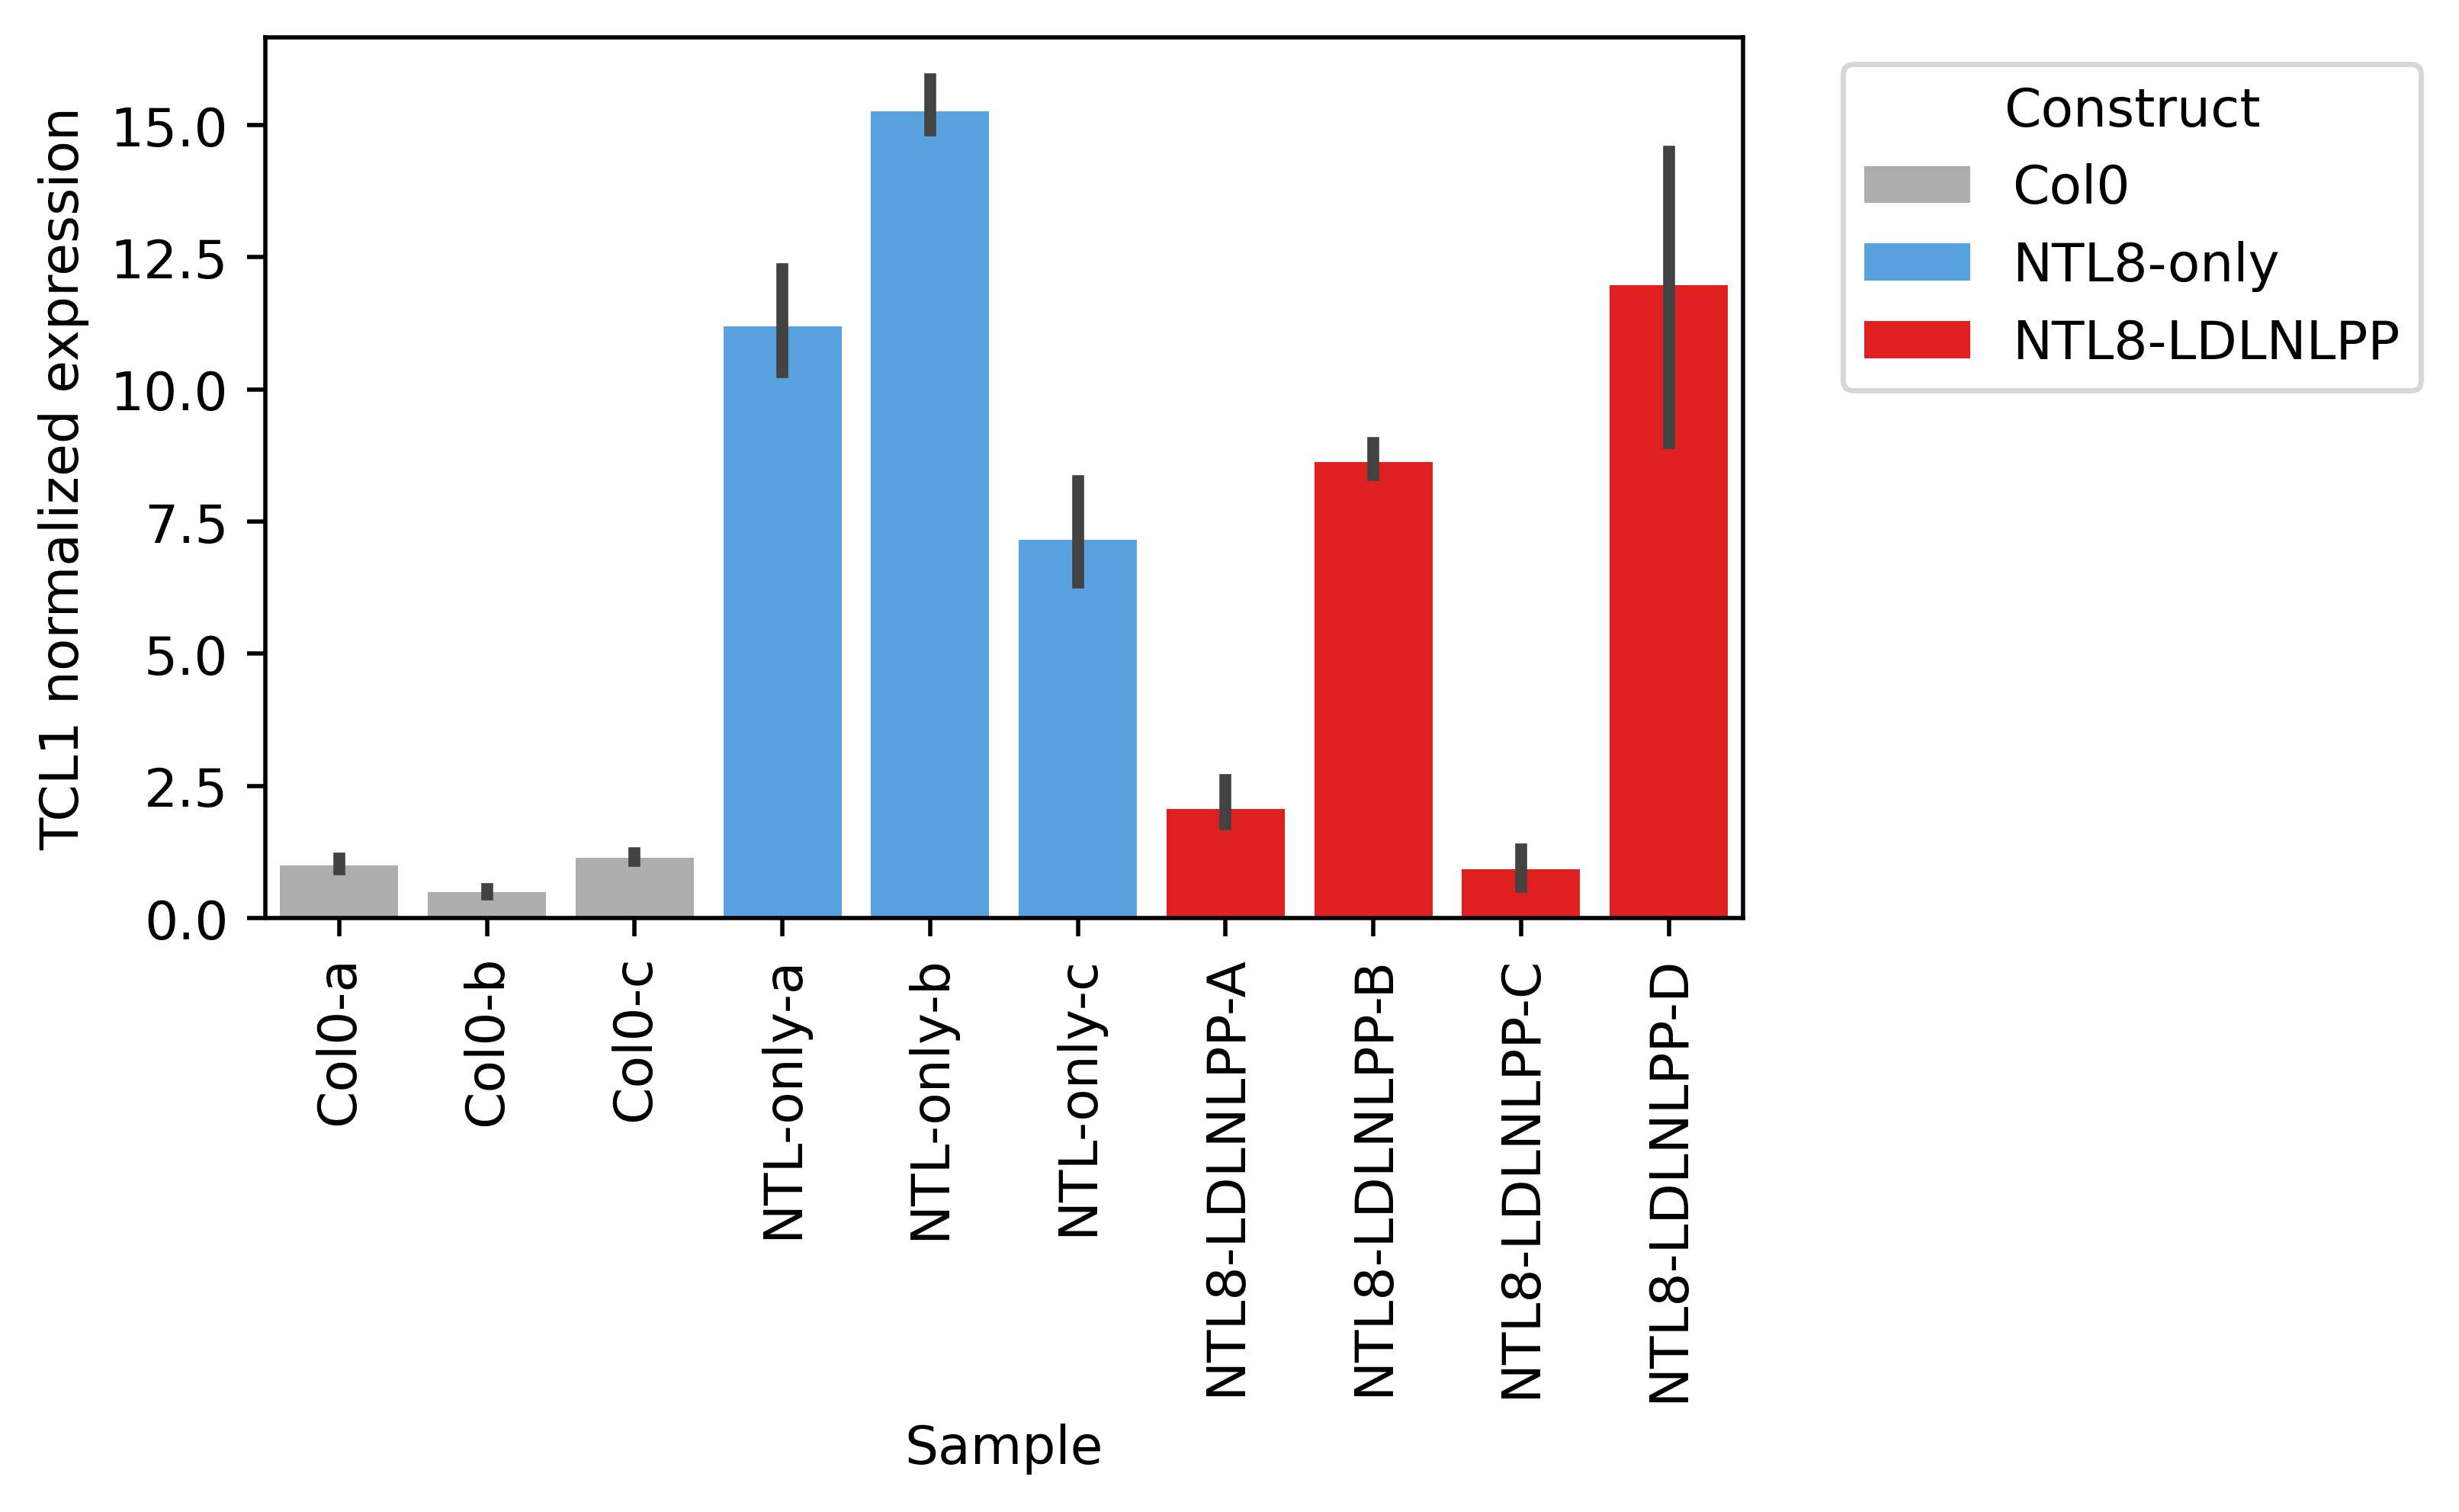

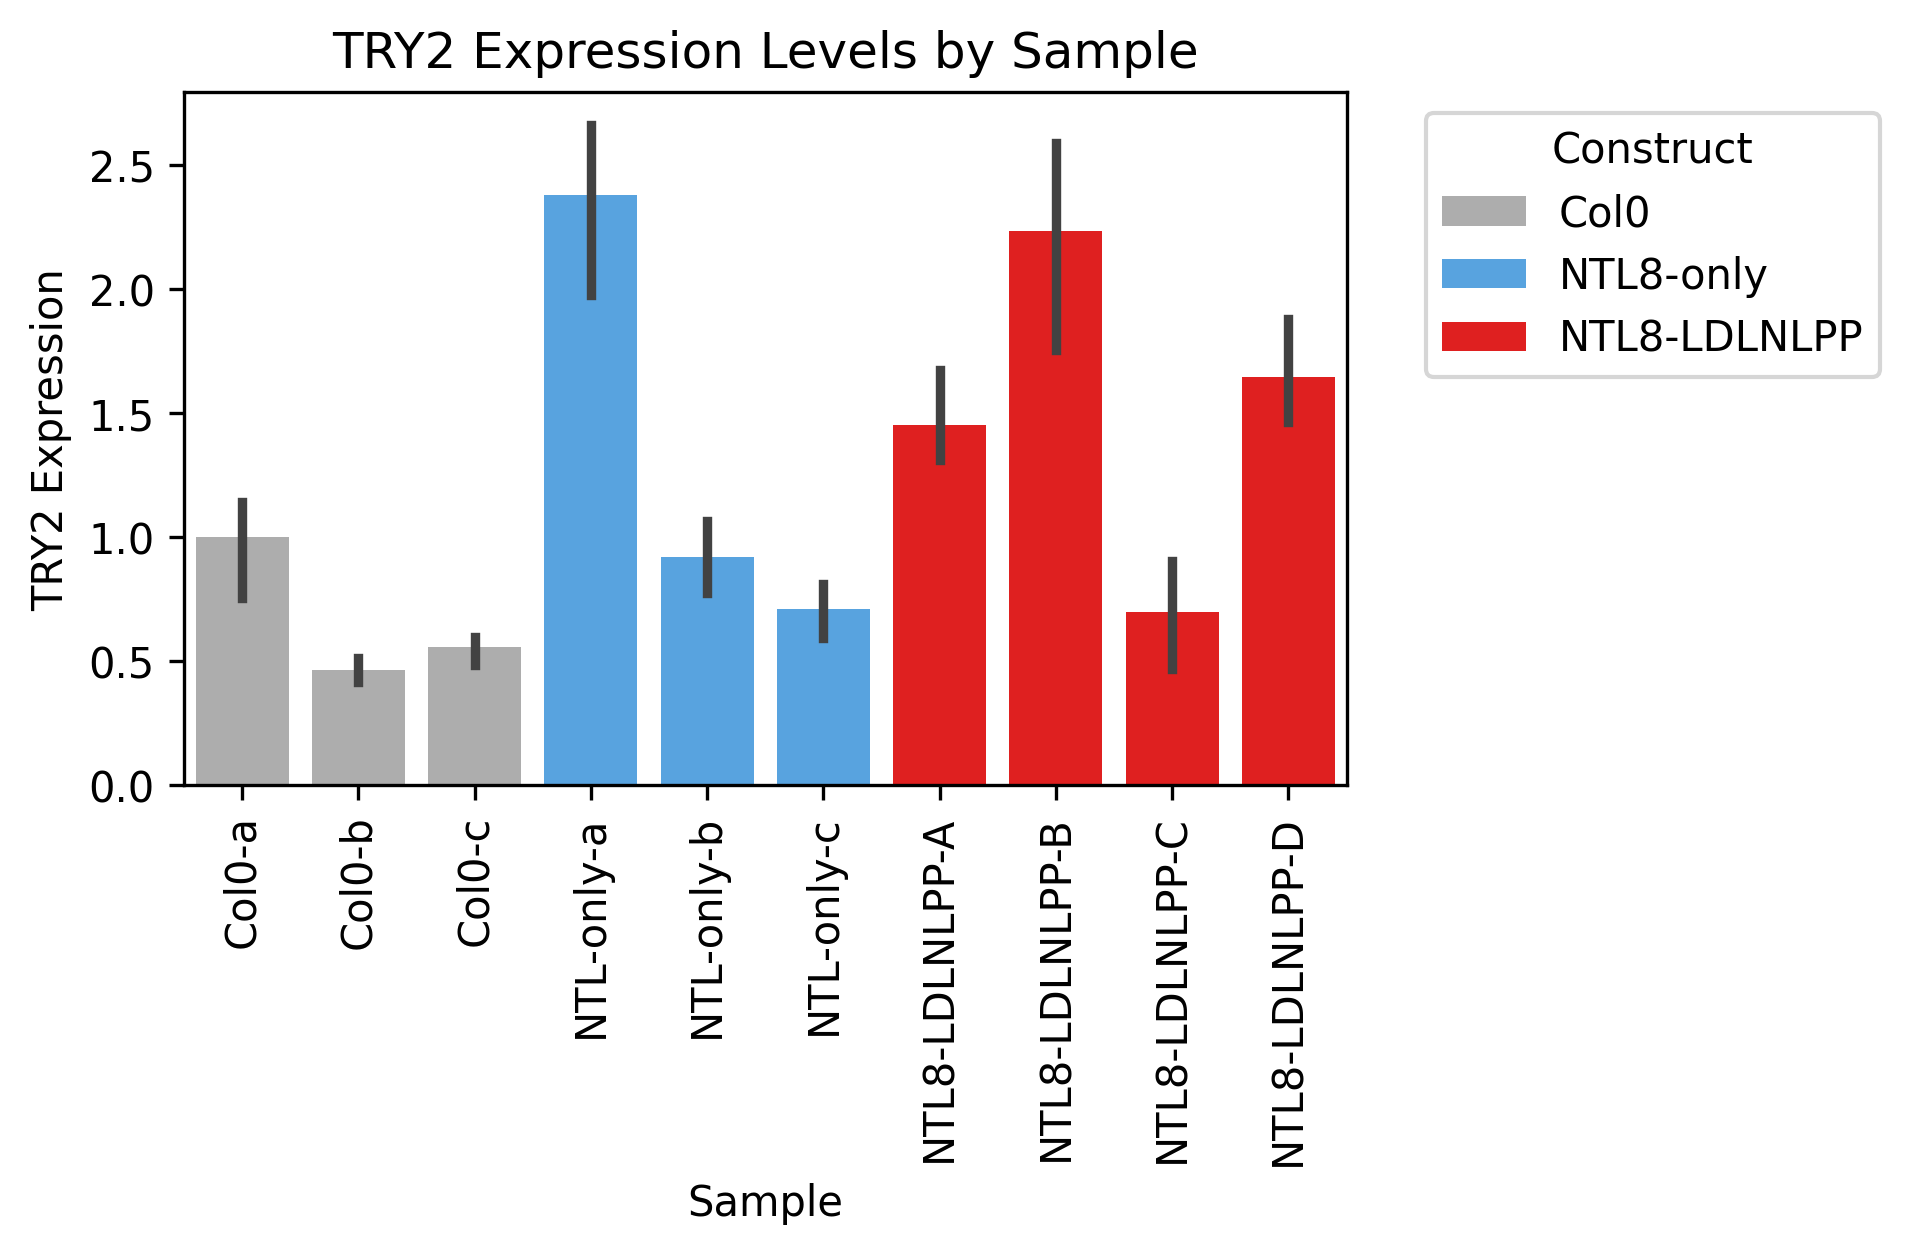

In [ ]:
# RTqPCR graph
# For Figure 4

color_map = {
    'Col0': '#adadad',  # Grey
    'NTL8-only': '#42a5f5',  # Blue
    'NTL8-LDLNLPP': '#ff0000'   # repressor red
}
# Sort the DataFrame on 'order' to maintain desired order in plotting
RTqPCR_sorted = RTqPCR.sort_values(by='order')

# Plotting
plt.figure(figsize=(5, 3), dpi=500)
bar_plot = sns.barplot(
    x='sample', y='Tcl1_exp', hue='construct', data=RTqPCR_sorted,
    palette=color_map, dodge=False)

plt.title('')
#plt.ylim(0, 25)
plt.xlabel('Sample')
plt.ylabel('TCL1 normalized expression')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

# Optionally, if you don't want to display the legend, you can hide it:
plt.legend(title='Construct', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# Sort the DataFrame on 'order' to maintain desired order in plotting
RTqPCR_sorted = RTqPCR.sort_values(by='order')

# Plotting
plt.figure(figsize=(5, 3), dpi=300)
bar_plot = sns.barplot(
    x='sample', y='TRY2_exp', hue='construct', data=RTqPCR_sorted,
    palette=color_map, dodge=False)

plt.title('TRY2 Expression Levels by Sample')
plt.xlabel('Sample')

plt.ylabel('TRY2 Expression')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

# Optionally, if you don't want to display the legend, you can hide it:
plt.legend(title='Construct', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()